<a href="https://colab.research.google.com/github/jonbonraki/30-seconds-of-code/blob/master/INN_Learner_Notebook_Full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

warnings.filterwarnings('ignore')
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


## Loading the dataset

In [2]:
data = pd.read_csv("/content/drive/My Drive/Neural Networks - Full Project/Churn.csv")
df = data.copy()
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

--- Age ---
Mean: 38.92
Median: 37.00
Mode: 37.00
Standard Deviation: 10.49
------------------



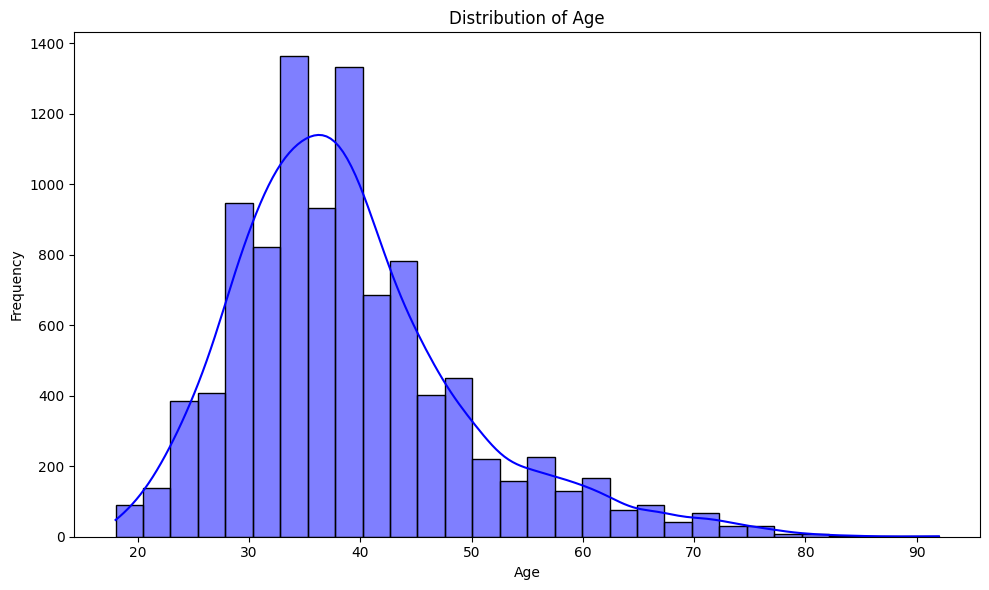

--- Balance ---
Mean: 76485.89
Median: 97198.54
Mode: 0.00
Standard Deviation: 62397.41
------------------



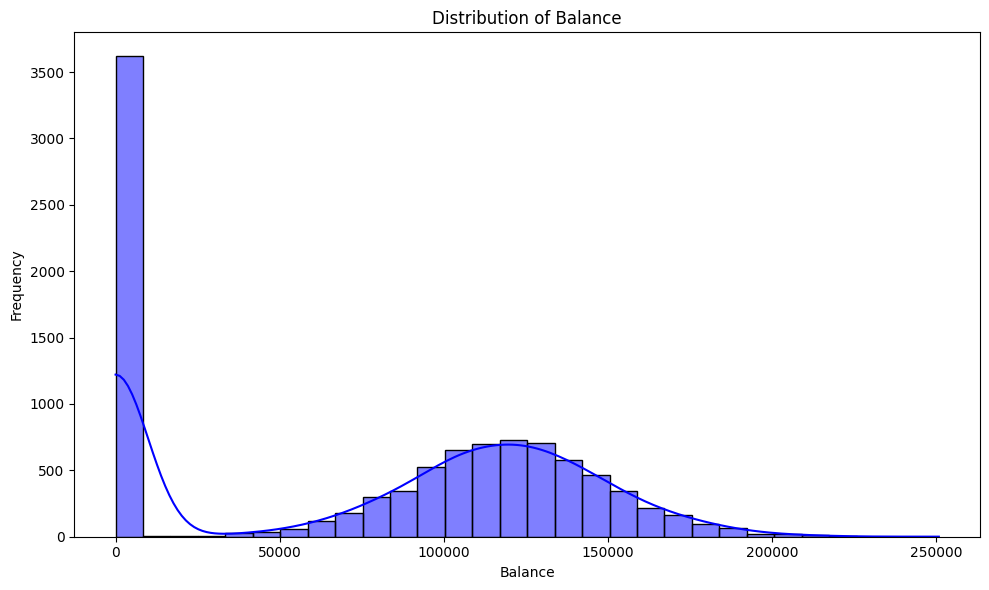

--- CreditScore ---
Mean: 650.53
Median: 652.00
Mode: 850.00
Standard Deviation: 96.65
------------------



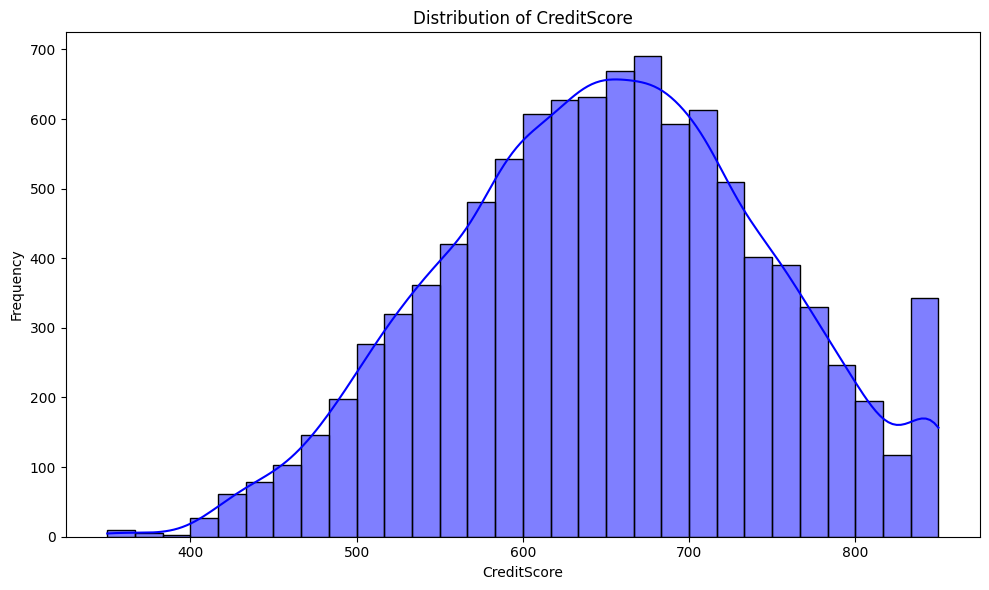

--- EstimatedSalary ---
Mean: 100090.24
Median: 100193.91
Mode: 24924.92
Standard Deviation: 57510.49
------------------



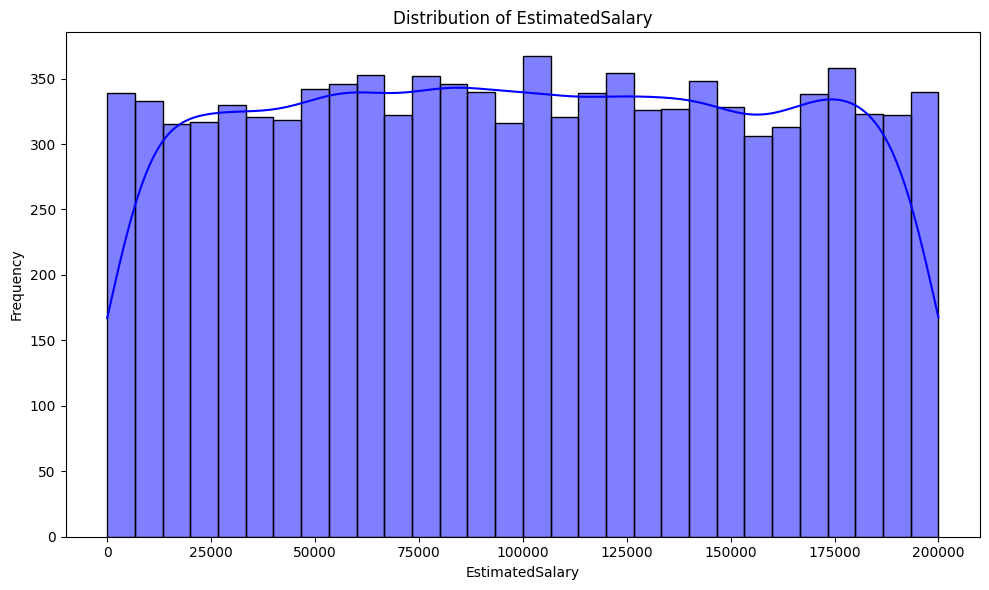

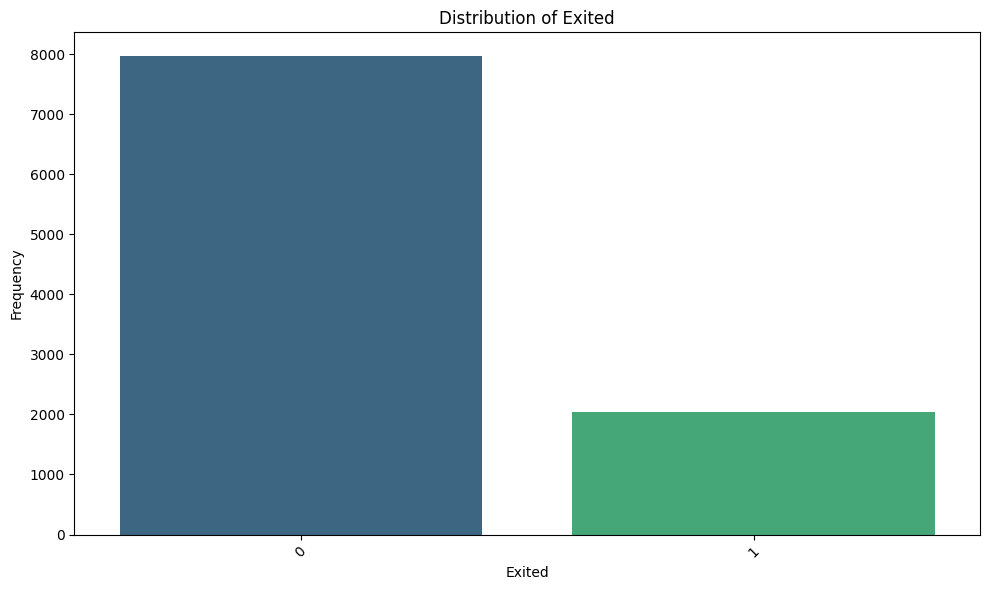

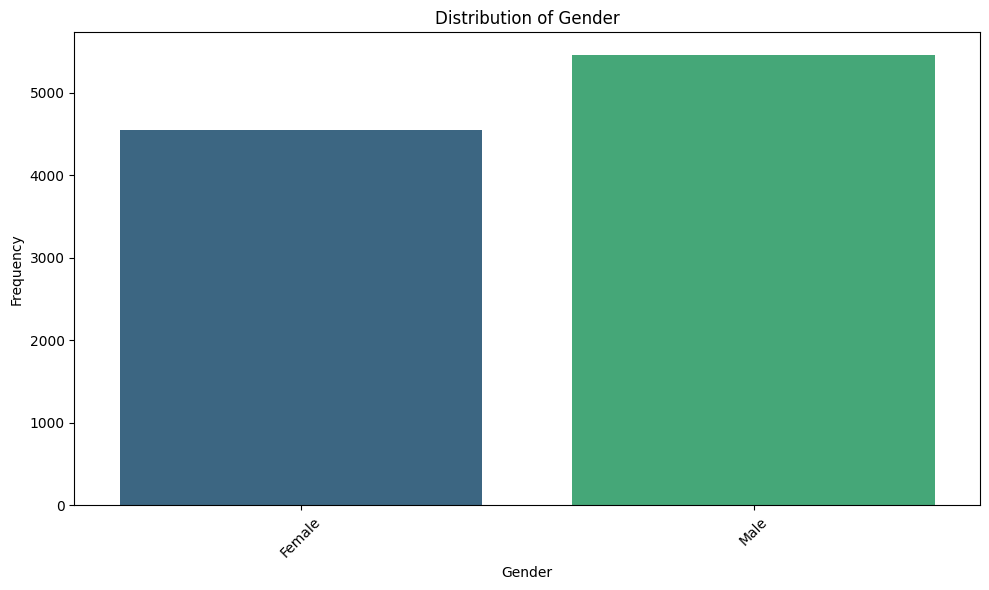

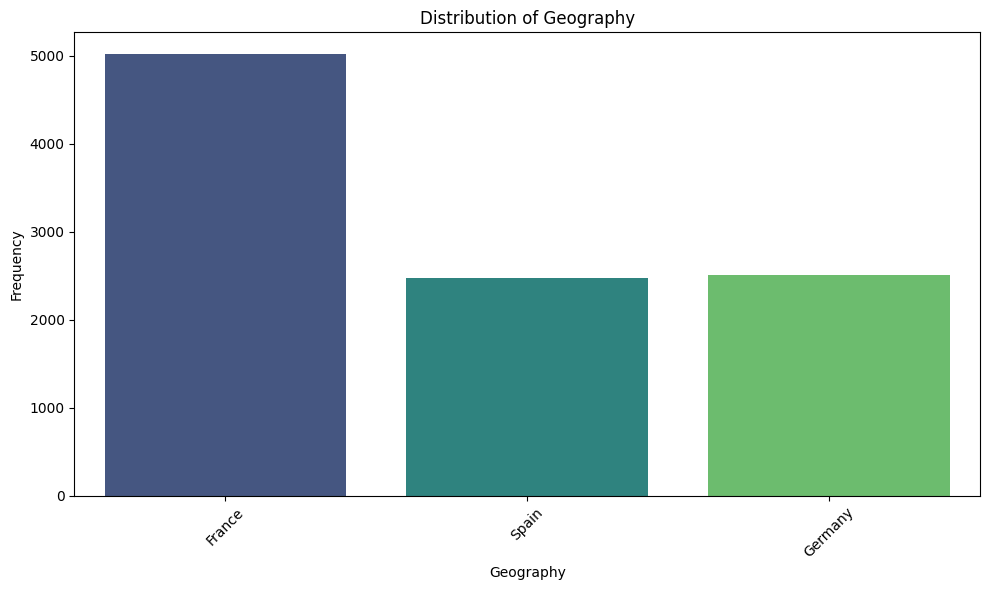

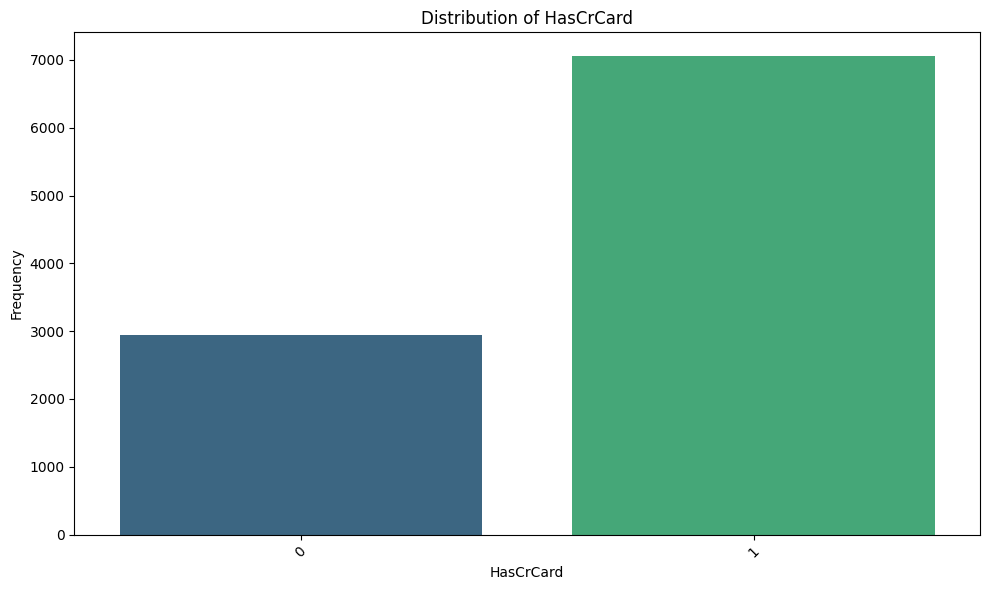

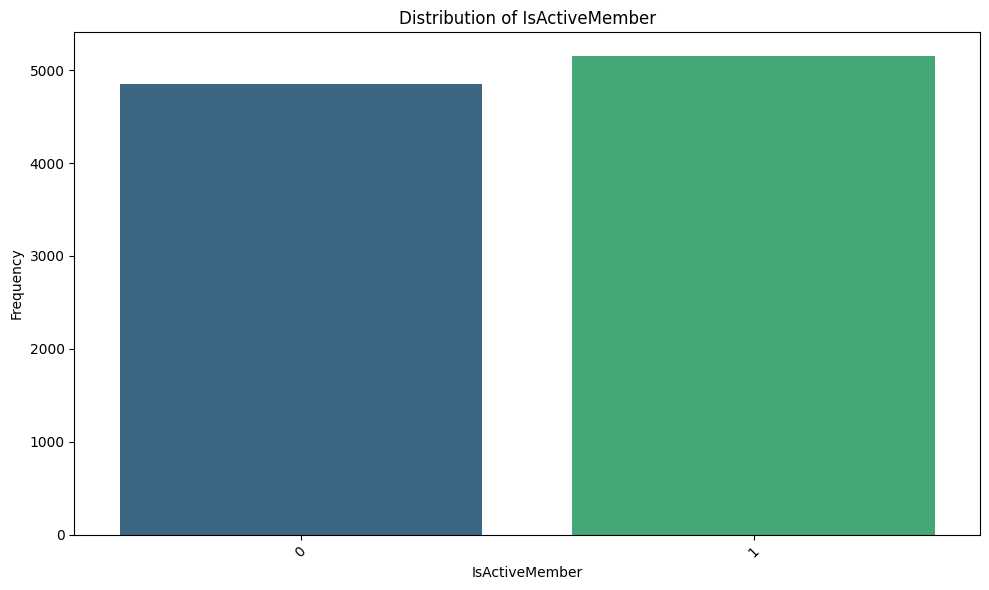

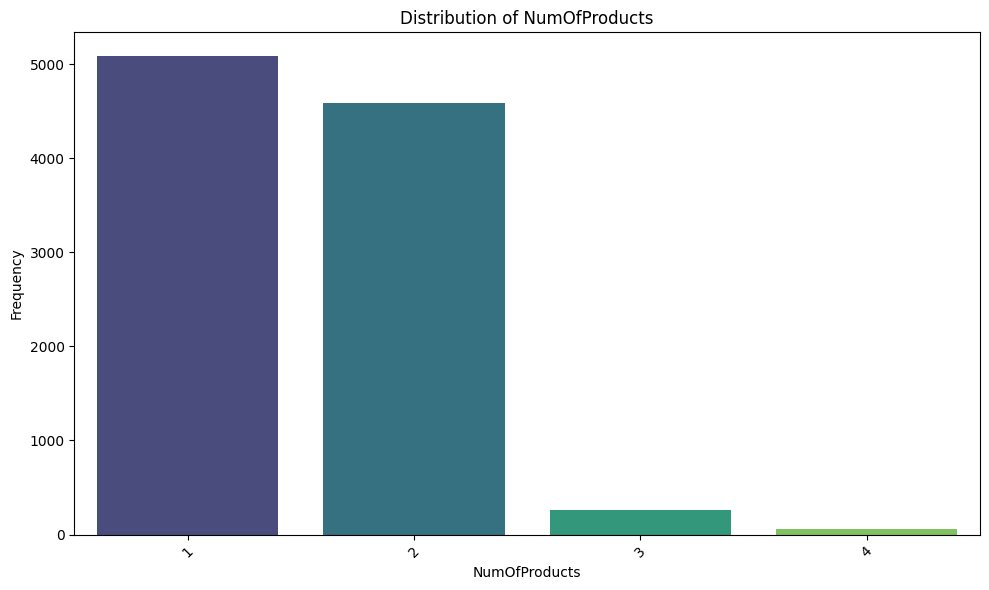

--- RowNumber ---
Mean: 5000.50
Median: 5000.50
Mode: 1.00
Standard Deviation: 2886.90
------------------



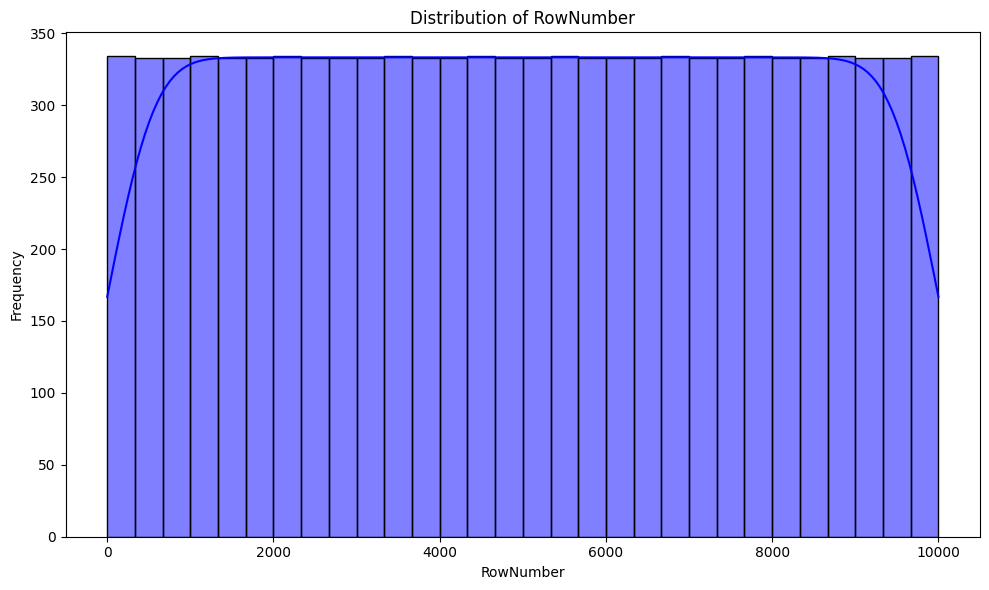

--- Tenure ---
Mean: 5.01
Median: 5.00
Mode: 2.00
Standard Deviation: 2.89
------------------



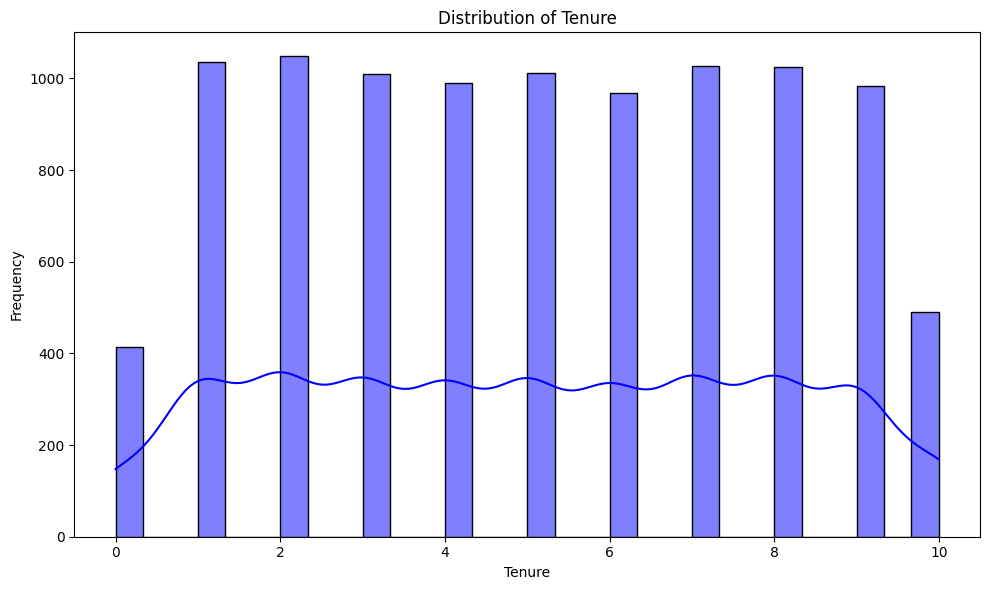

In [6]:


# List of columns for univariate analysis (excluding CustomerId and Surname)
columns_for_analysis = df.columns.difference(['CustomerId', 'Surname'])

# Function to perform univariate analysis
def univariate_analysis(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        if df[col].dtype == 'object' or df[col].nunique() <= 10:  # Categorical
            sns.countplot(data=df, x=col, palette='viridis')
            plt.title(f'Distribution of {col}')
            plt.ylabel('Frequency')
            plt.xlabel(col)
            plt.xticks(rotation=45)
        else:  # Numerical
            sns.histplot(df[col], bins=30, kde=True, color='blue')
            plt.title(f'Distribution of {col}')
            plt.ylabel('Frequency')
            plt.xlabel(col)

            # Print summary statistics
            print(f'--- {col} ---')
            print(f'Mean: {df[col].mean():.2f}')
            print(f'Median: {df[col].median():.2f}')
            print(f'Mode: {df[col].mode()[0]:.2f}')
            print(f'Standard Deviation: {df[col].std():.2f}')
            print('------------------\n')

        plt.tight_layout()
        plt.show()

# Run univariate analysis
univariate_analysis(df, columns_for_analysis)


Here is an observation on the univariate analysis for the given variables:

### Age
- **Mean**: 38.92
- **Median**: 37.00
- **Mode**: 37.00
- **Standard Deviation**: 10.49

**Observation**: The average age of the sample is approximately 39 years, with a median of 37 years, indicating that the data is fairly centered around this value. The mode is also 37, suggesting that this age is the most common among the sample. The standard deviation of 10.49 indicates a moderate spread around the mean, meaning there is some variability in the ages of individuals.

### Balance
- **Mean**: 76,485.89
- **Median**: 97,198.54
- **Mode**: 0.00
- **Standard Deviation**: 62,397.41

**Observation**: The mean balance is significantly lower than the median, which suggests a right-skewed distribution (a few very low values are pulling the mean down). The mode of 0.00 indicates that a substantial number of individuals have a balance of 0, possibly implying a large proportion of account holders with no balance. The high standard deviation reflects a large variability in the balance values.

### CreditScore
- **Mean**: 650.53
- **Median**: 652.00
- **Mode**: 850.00
- **Standard Deviation**: 96.65

**Observation**: The mean and median credit scores are very close to each other, suggesting a relatively symmetric distribution of credit scores. However, the mode is significantly higher (850), which may indicate that a notable number of individuals have exceptionally high credit scores, potentially skewing the perception of average credit scores. The standard deviation suggests a moderate spread in credit scores around the mean.

### EstimatedSalary
- **Mean**: 100,090.24
- **Median**: 100,193.91
- **Mode**: 24,924.92
- **Standard Deviation**: 57,510.49

**Observation**: The mean and median salaries are very close, indicating a fairly symmetric distribution of salaries. However, the mode is considerably lower than both the mean and median, which could imply that a significant number of individuals earn less than the average, leading to a right-skewed distribution. The high standard deviation indicates considerable variability in salaries.

### RowNumber
- **Mean**: 5000.50
- **Median**: 5000.50
- **Mode**: 1.00
- **Standard Deviation**: 2886.90

**Observation**: The mean and median row numbers are identical, indicating that the row numbers are evenly distributed around this value. The mode of 1.00 suggests that the dataset might have been ordered or indexed starting from 1, which is not unusual but should be considered when interpreting the data. The large standard deviation indicates a wide spread in row numbers, but this is often expected if the row numbers simply represent indices.

### Tenure
- **Mean**: 5.01
- **Median**: 5.00
- **Mode**: 2.00
- **Standard Deviation**: 2.89

**Observation**: The mean and median tenure values are very close, indicating a roughly symmetric distribution of tenure. However, the mode is lower (2.00), suggesting that tenure of 2 years is more common than other values. The standard deviation of 2.89 indicates some variability in tenure, but it is not excessively high.

These observations help understand the distribution, central tendencies, and variability of the data across different variables.

### Bivariate Analysis

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

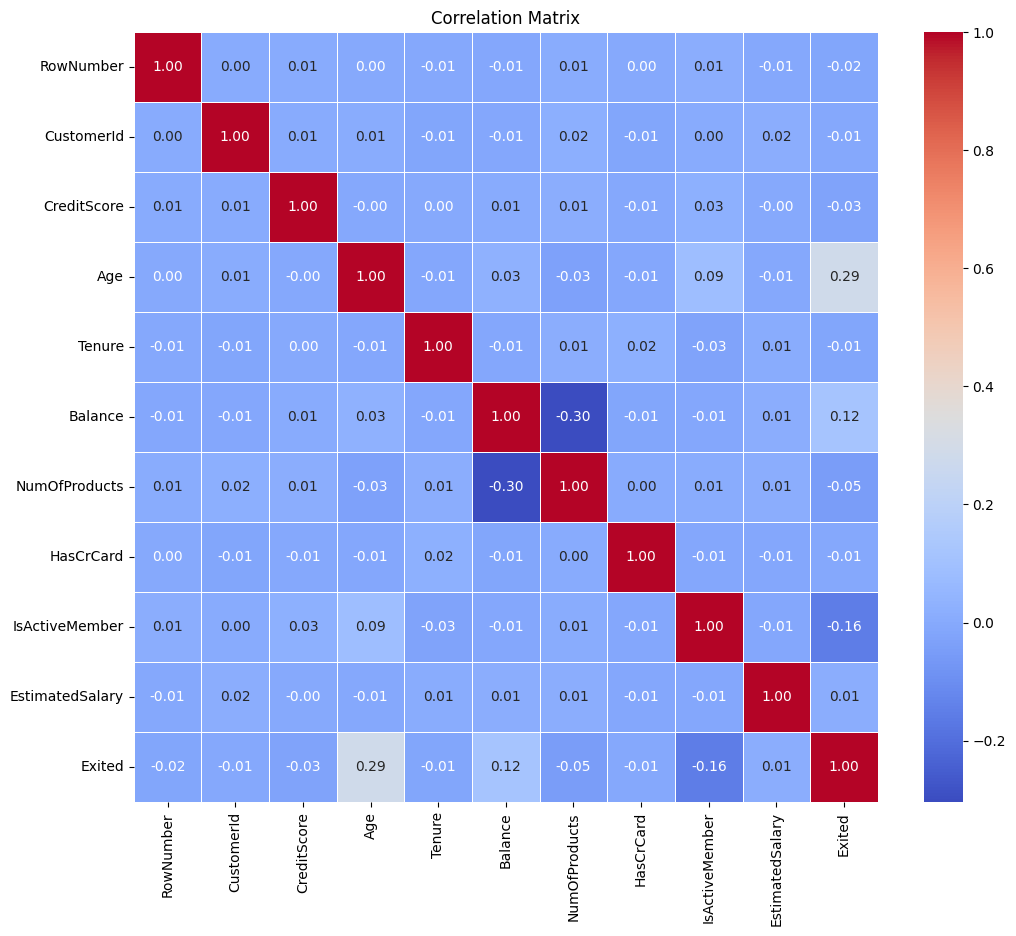

In [7]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

print(correlation_matrix);

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Here are the observations from the correlation matrix:

### Observations:

1. **`RowNumber`**:
   - **Correlation with `Exited`**: `-0.016571`
     - There is a very weak negative correlation between `RowNumber` and `Exited`. This suggests that `RowNumber` (likely an index or a sequential number) has almost no impact on whether a customer exits or not.

2. **`CustomerId`**:
   - **Correlation with `Exited`**: `-0.006248`
     - Similar to `RowNumber`, `CustomerId` has an almost negligible correlation with `Exited`, indicating it does not significantly influence customer churn.

3. **`CreditScore`**:
   - **Correlation with `Exited`**: `-0.027094`
     - There is a very weak negative correlation between `CreditScore` and `Exited`. This suggests that a customer's credit score has little impact on their likelihood to leave the bank.

4. **`Age`**:
   - **Correlation with `Exited`**: `0.285323`
     - There is a moderate positive correlation between `Age` and `Exited`. Older customers tend to have a higher likelihood of exiting the bank, which might suggest that age could be a factor in customer retention strategies.

5. **`Tenure`**:
   - **Correlation with `Exited`**: `-0.014001`
     - A very weak negative correlation between `Tenure` and `Exited` indicates that the number of years a customer has been with the bank has little effect on their likelihood to leave.

6. **`Balance`**:
   - **Correlation with `Exited`**: `0.118533`
     - There is a weak positive correlation between `Balance` and `Exited`. This suggests that customers with higher balances may have a slightly higher likelihood of leaving the bank, although the effect is not strong.

7. **`NumOfProducts`**:
   - **Correlation with `Exited`**: `-0.047820`
     - A weak negative correlation indicates that the number of products a customer has is only weakly associated with their likelihood to exit.

8. **`HasCrCard`**:
   - **Correlation with `Exited`**: `-0.007138`
     - There is a very weak negative correlation, suggesting that whether or not a customer has a credit card has almost no impact on their decision to leave.

9. **`IsActiveMember`**:
   - **Correlation with `Exited`**: `-0.156128`
     - There is a moderate negative correlation between `IsActiveMember` and `Exited`. Inactive members have a higher likelihood of exiting the bank, highlighting the importance of active engagement for retention.

10. **`EstimatedSalary`**:
    - **Correlation with `Exited`**: `0.012097`
      - A very weak positive correlation, implying that estimated salary has minimal impact on the likelihood of exiting the bank.

### Summary:

- **Strongest Positive Correlation**: `Age` with `Exited` (0.285323). Older customers are somewhat more likely to leave.
- **Strongest Negative Correlation**: `IsActiveMember` with `Exited` (-0.156128). Inactive members are more likely to leave.

Most variables exhibit weak correlations with customer churn. However, `Age` and `IsActiveMember` show more noticeable relationships, suggesting that focusing on customer engagement and understanding the needs of different age groups might be beneficial in reducing churn.

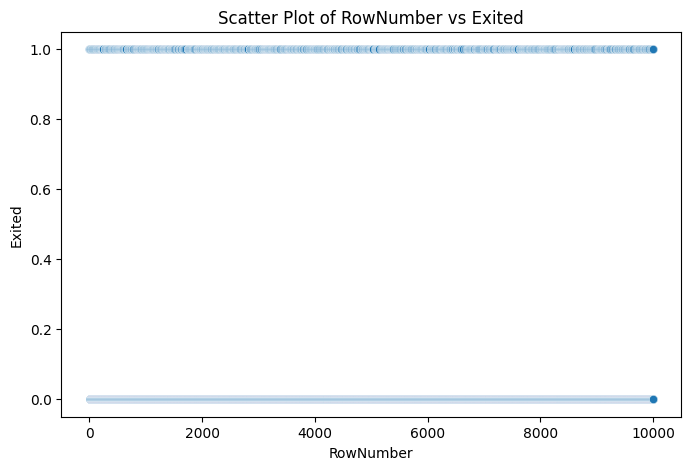

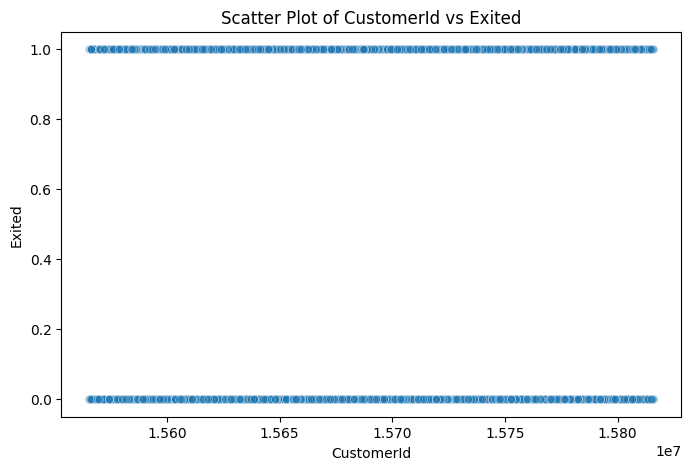

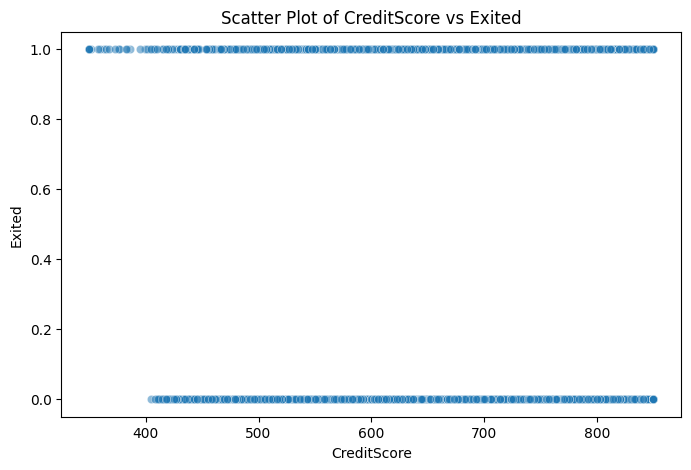

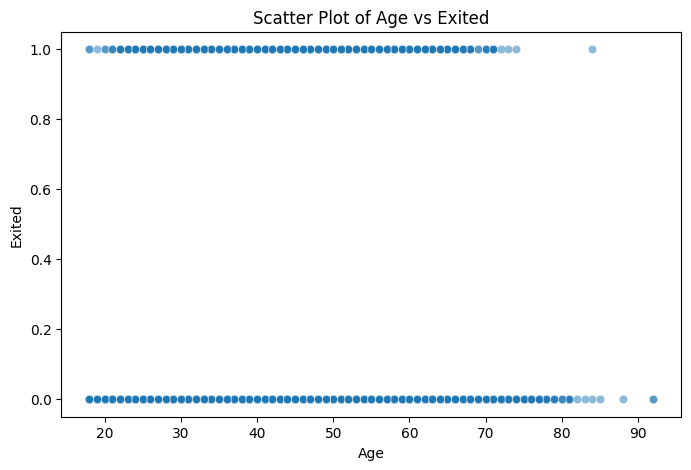

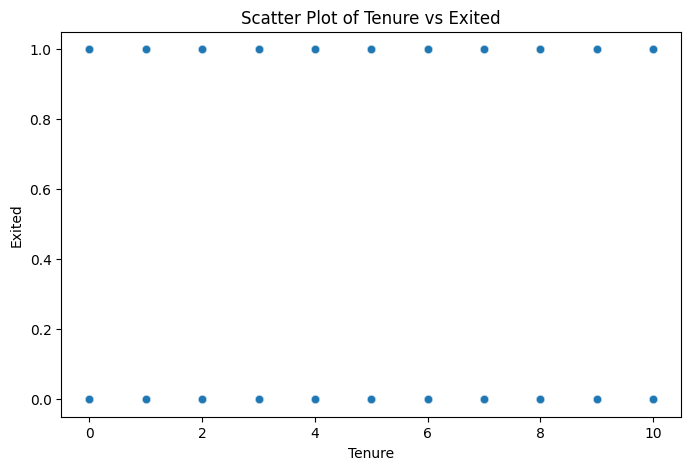

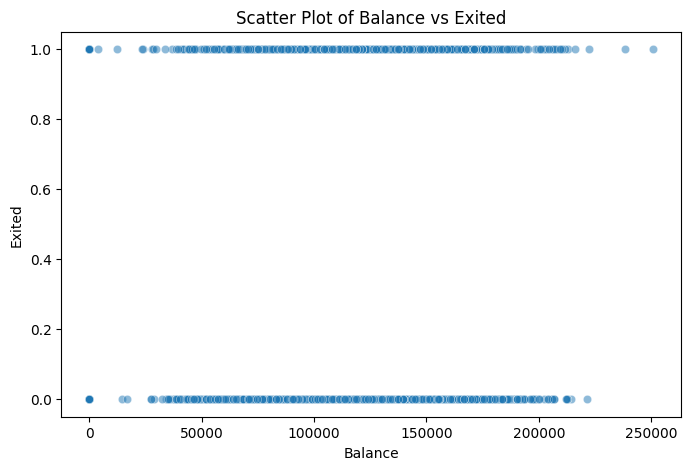

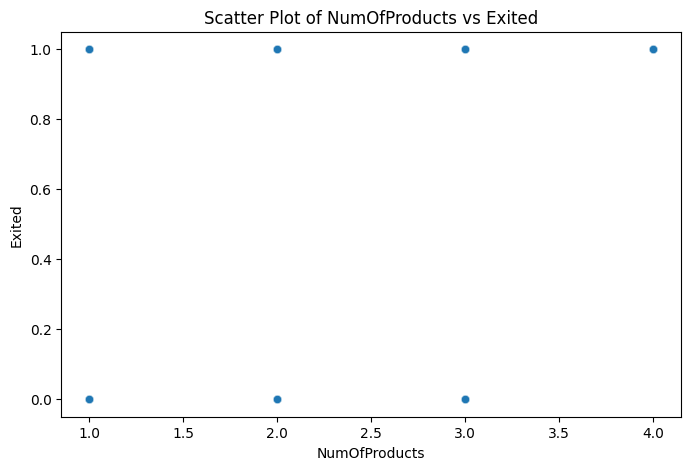

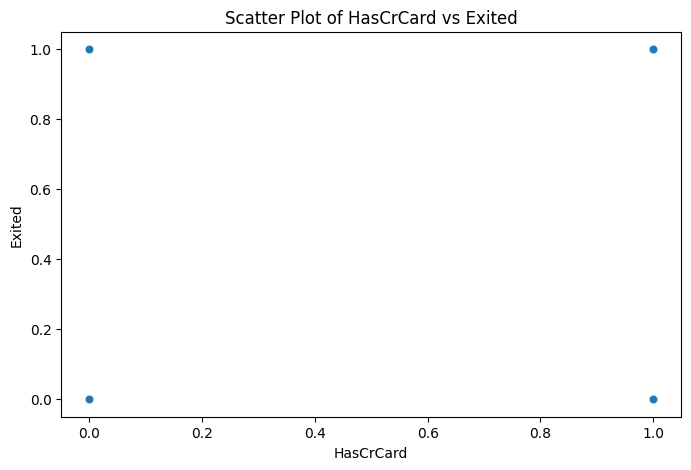

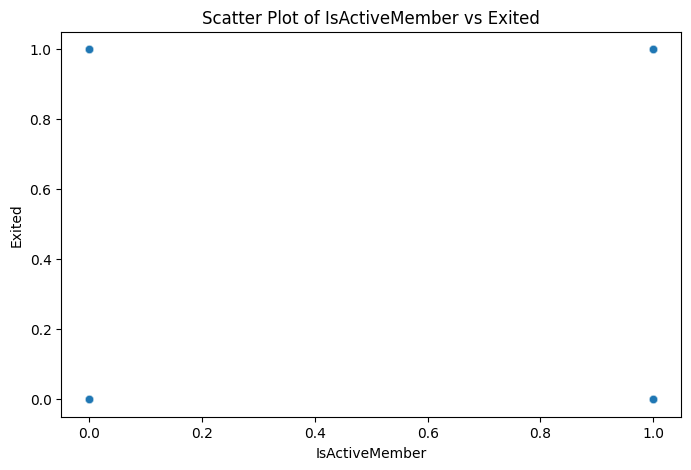

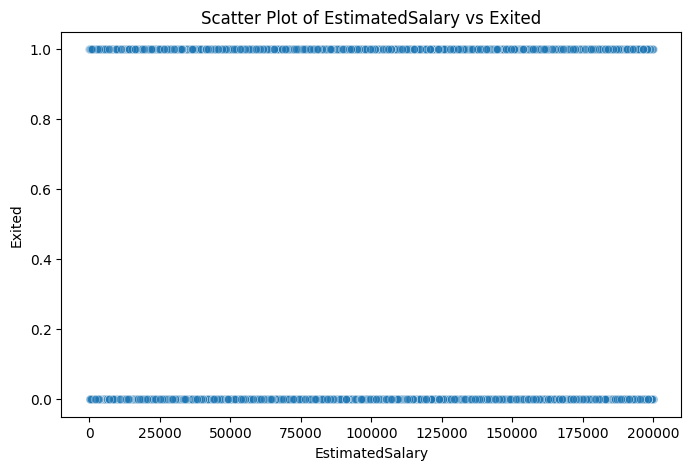

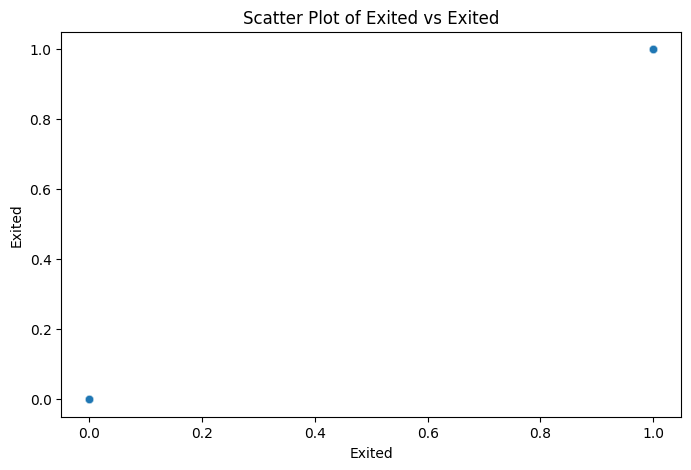

In [8]:
# Plot scatter plots
for col in numerical_df:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y='Exited', alpha=0.5)
    plt.title(f'Scatter Plot of {col} vs Exited')
    plt.xlabel(col)
    plt.ylabel('Exited')
    plt.show()

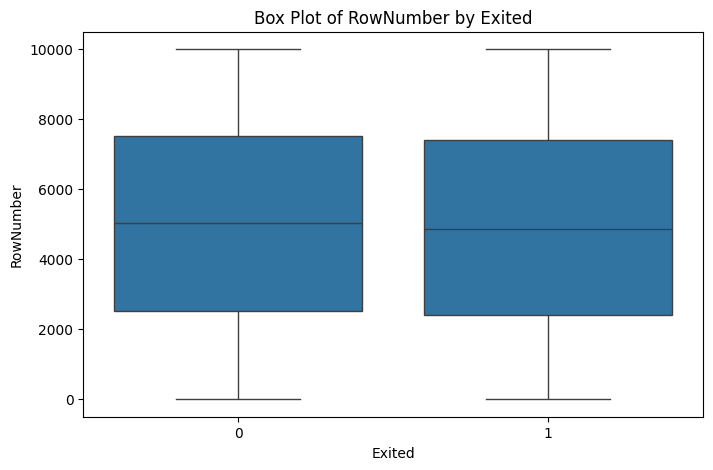

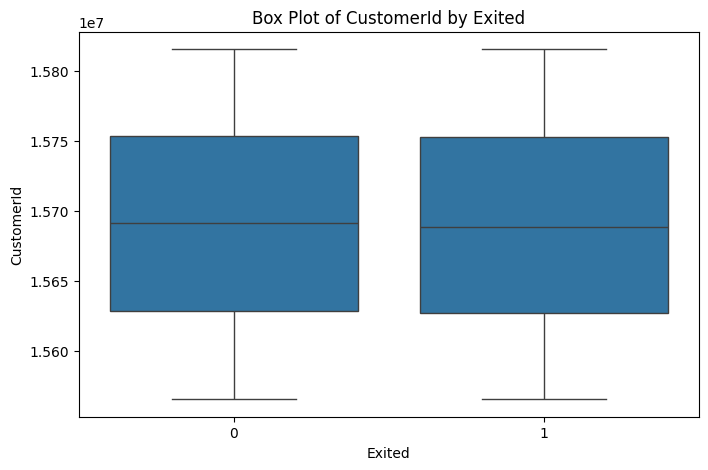

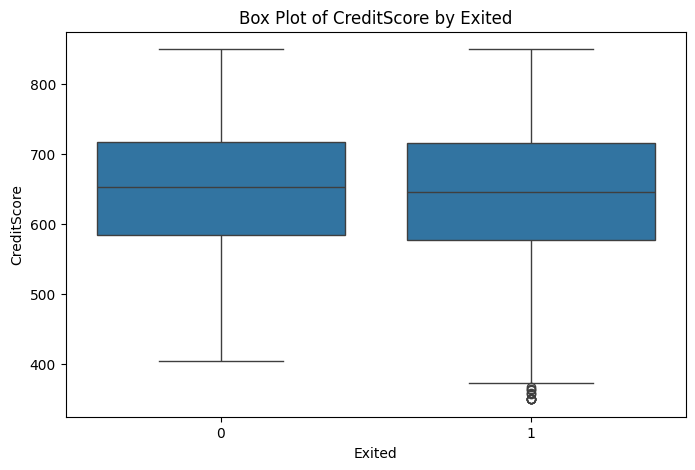

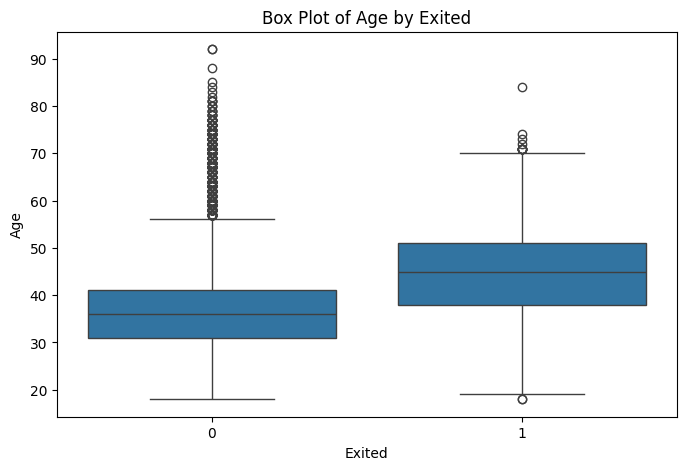

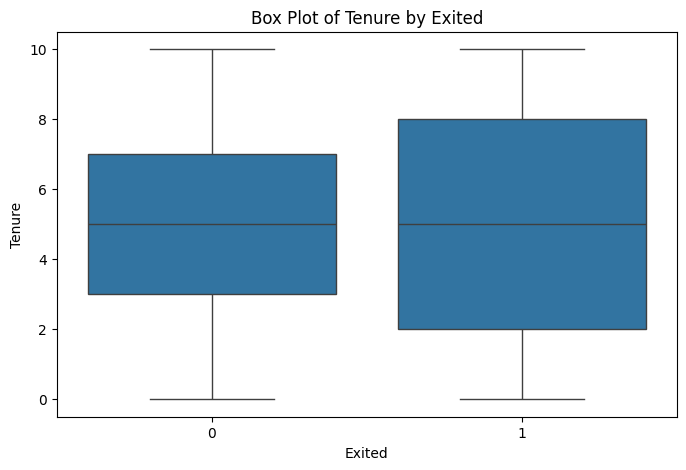

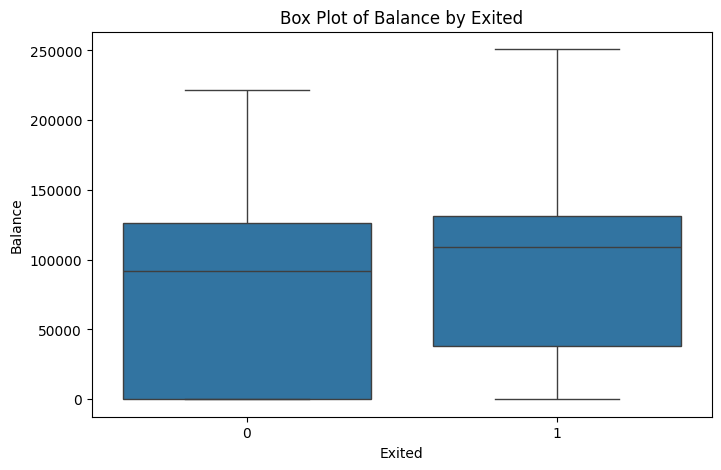

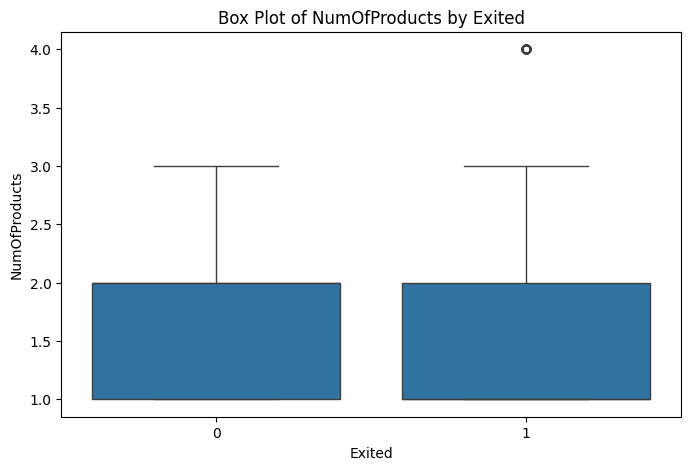

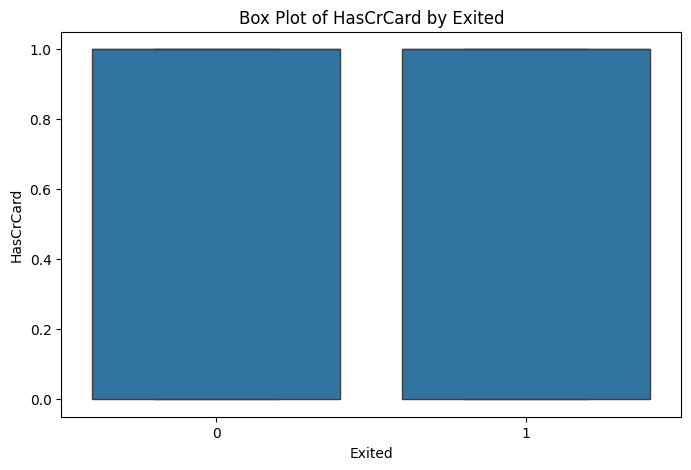

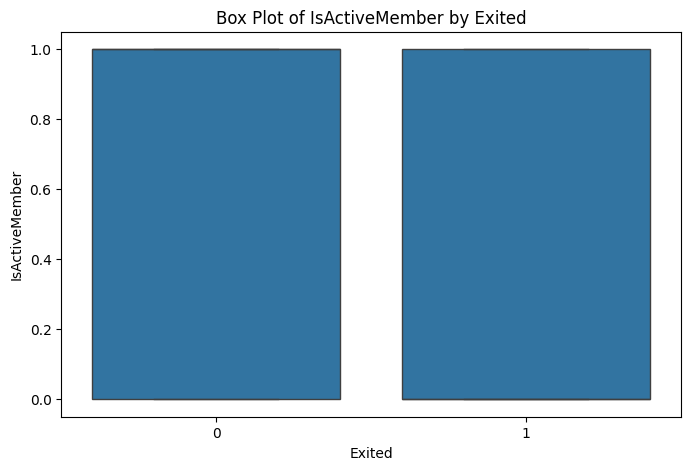

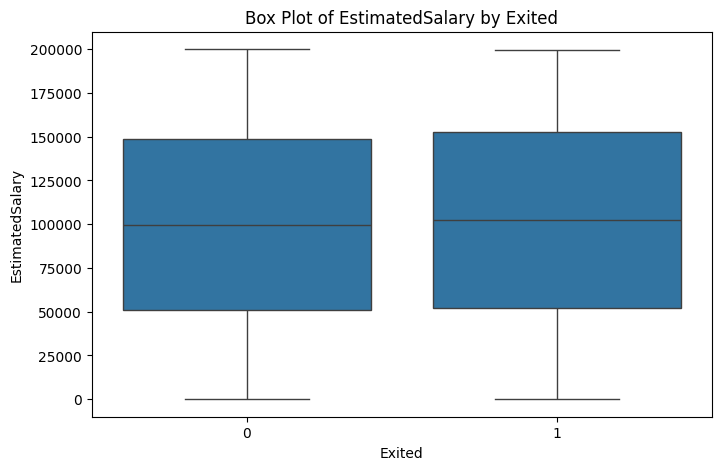

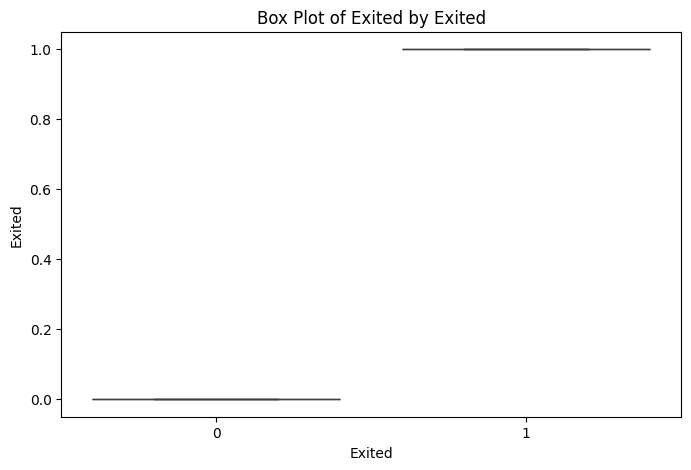

In [9]:
# Plot box plots
for col in numerical_df:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Exited', y=col)
    plt.title(f'Box Plot of {col} by Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)
    plt.show()

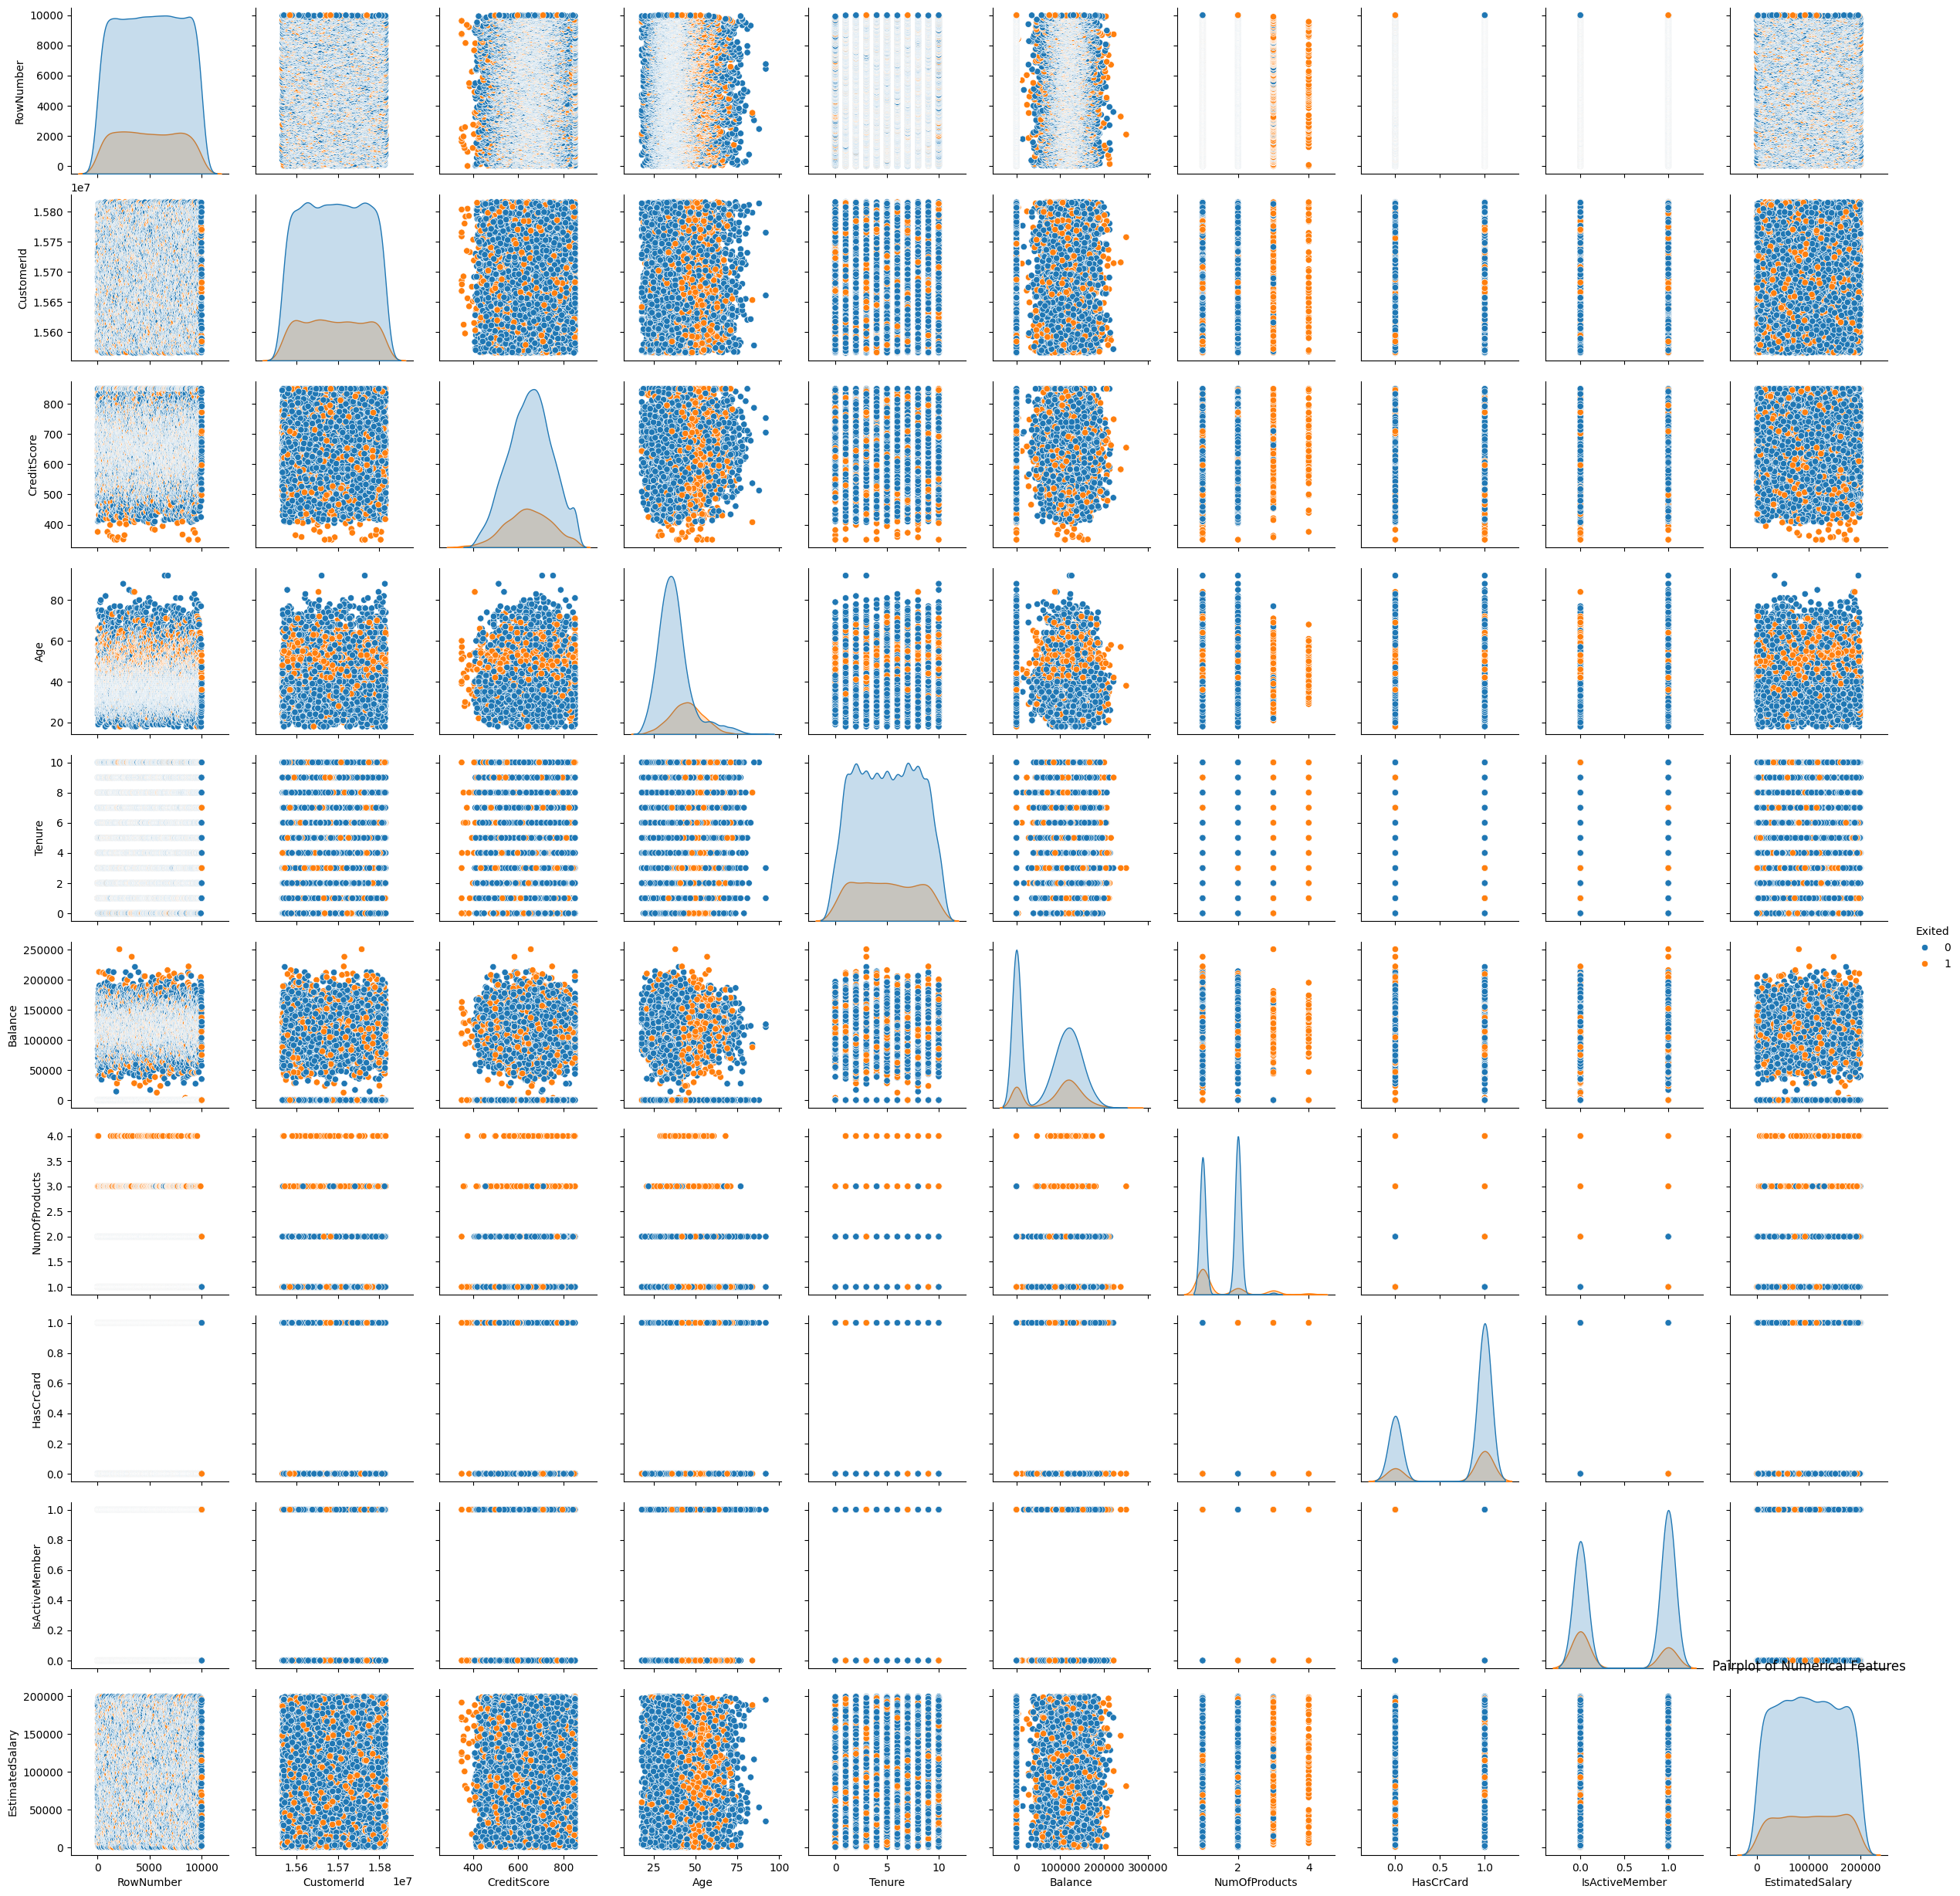

In [10]:

# Plot pairplot
sns.pairplot(numerical_df, hue='Exited')
plt.title('Pairplot of Numerical Features')
plt.show()

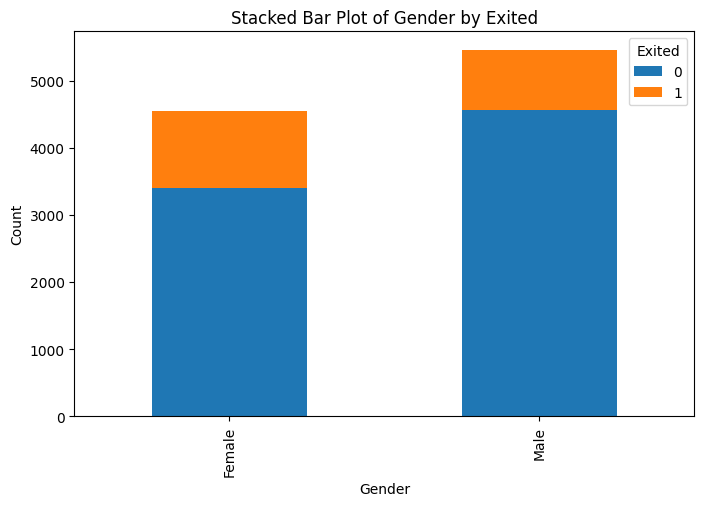

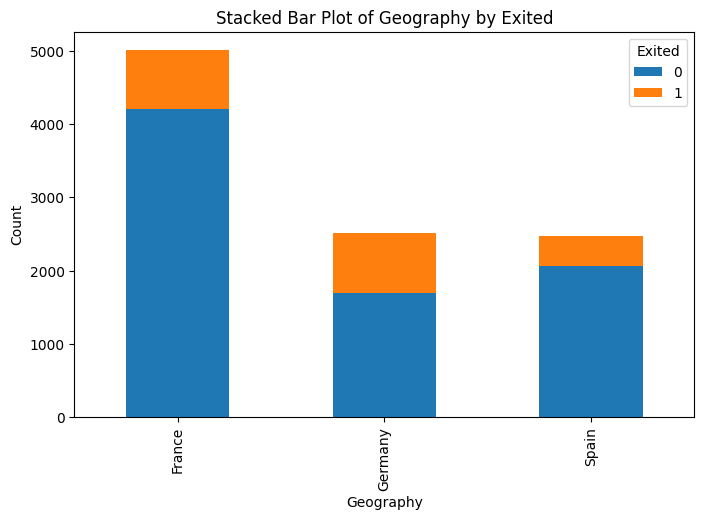

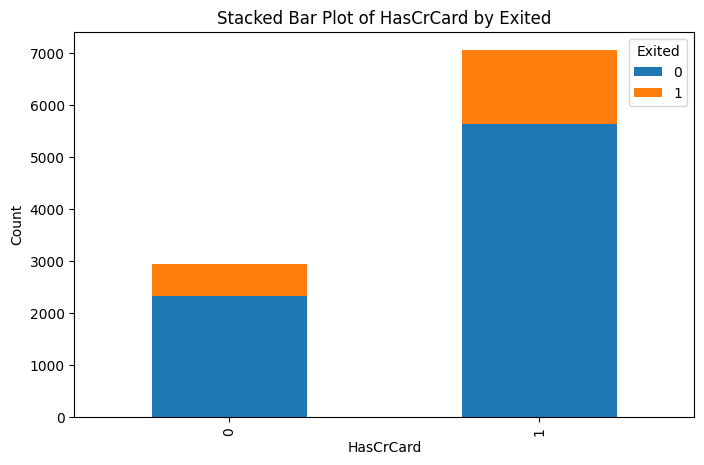

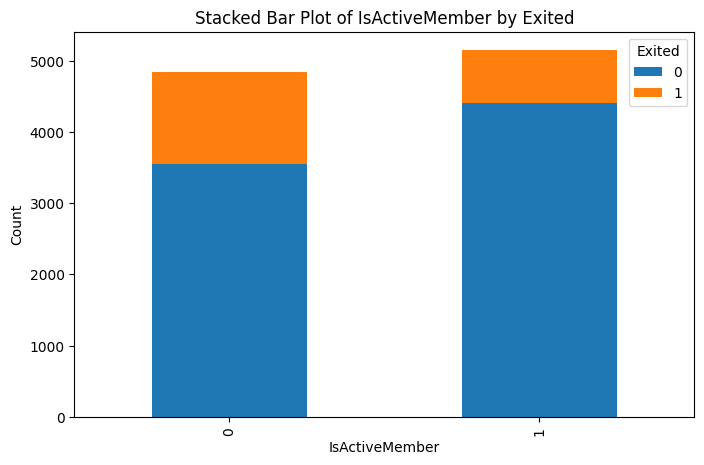

In [11]:
# List of categorical columns to plot stacked bar plots
categorical_cols = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']

# Function to plot stacked bar plots
def plot_stacked_bar(col):
    cross_tab = pd.crosstab(df[col], df['Exited'])
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Stacked Bar Plot of {col} by Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Exited')
    plt.show()

# Plot stacked bar plots
for col in categorical_cols:
    plot_stacked_bar(col)

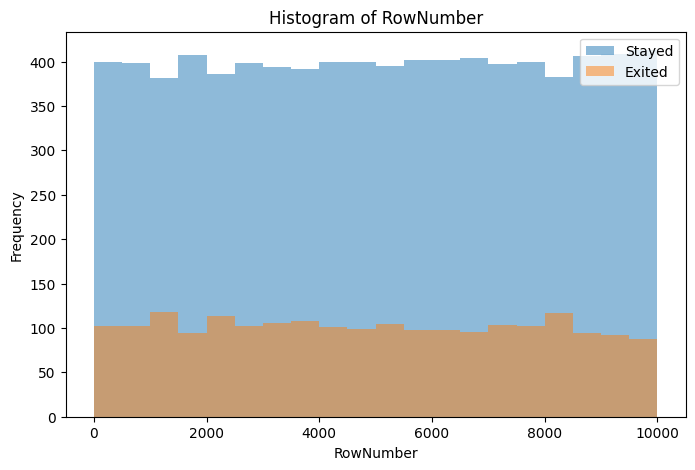

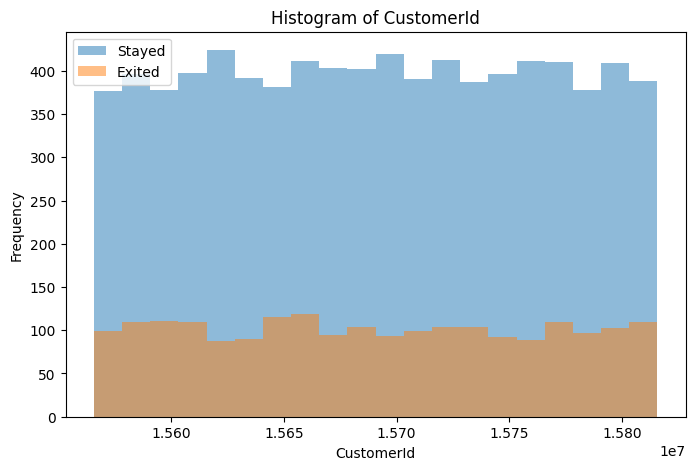

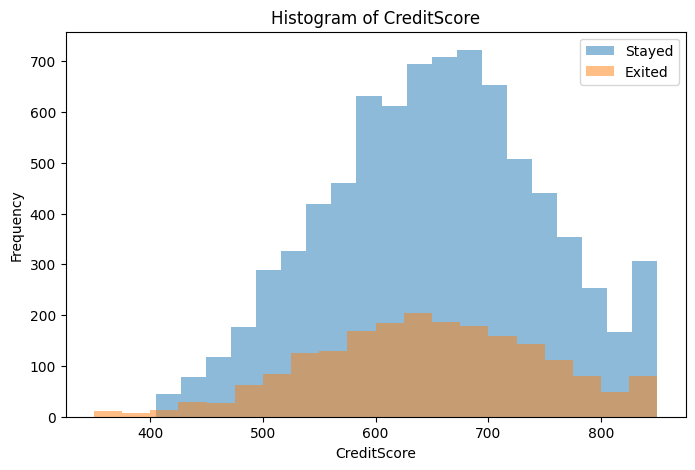

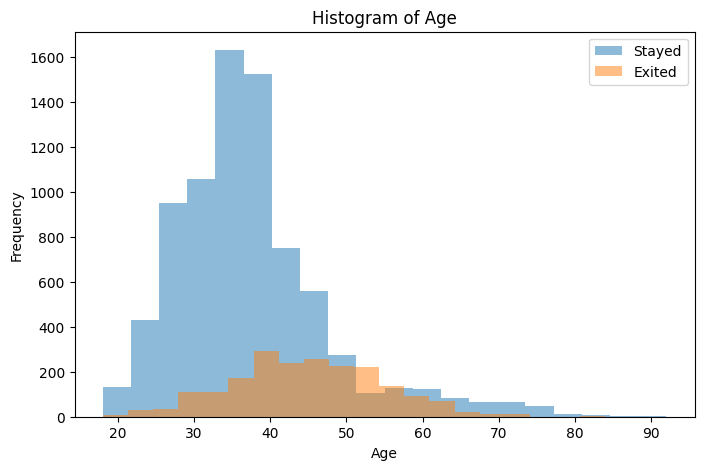

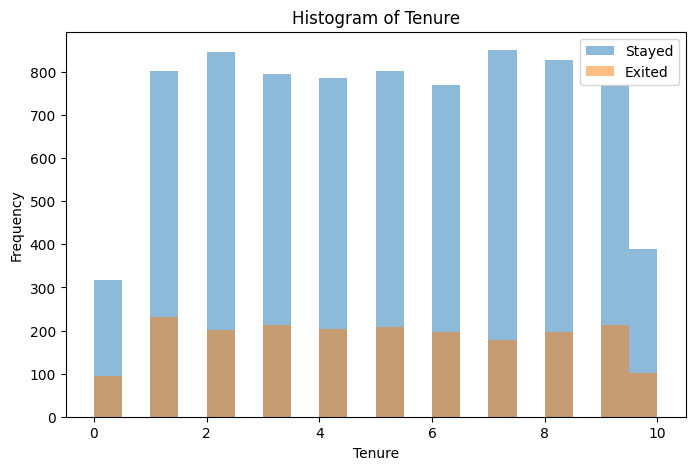

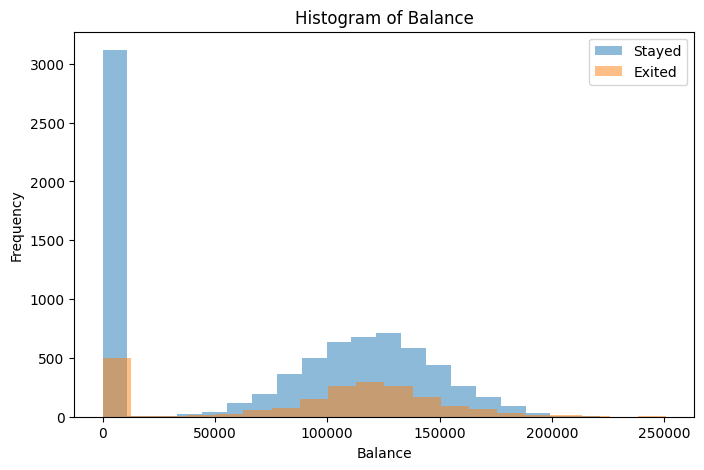

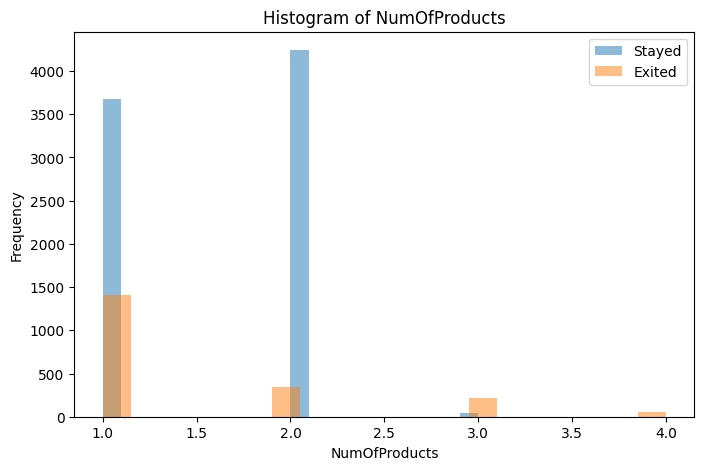

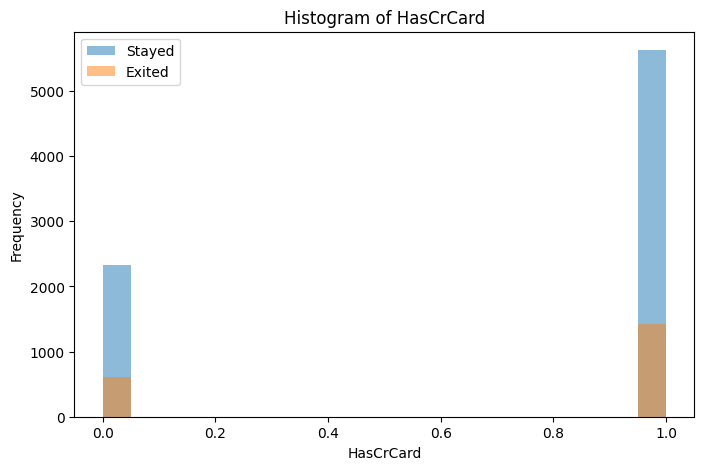

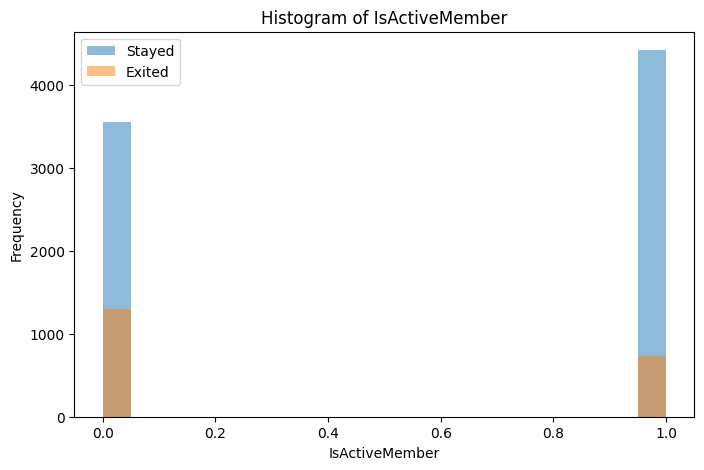

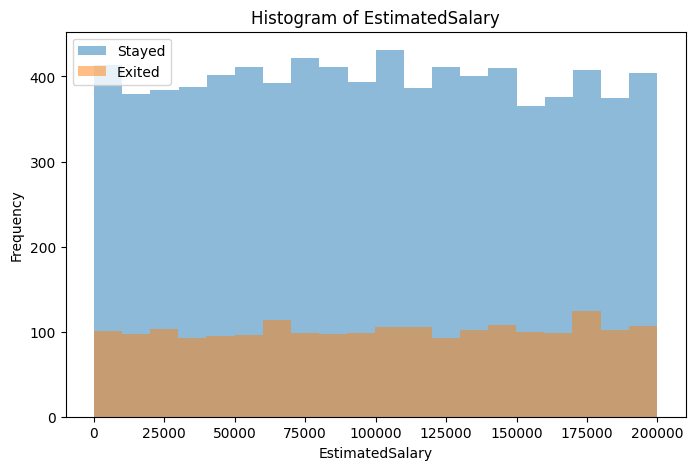

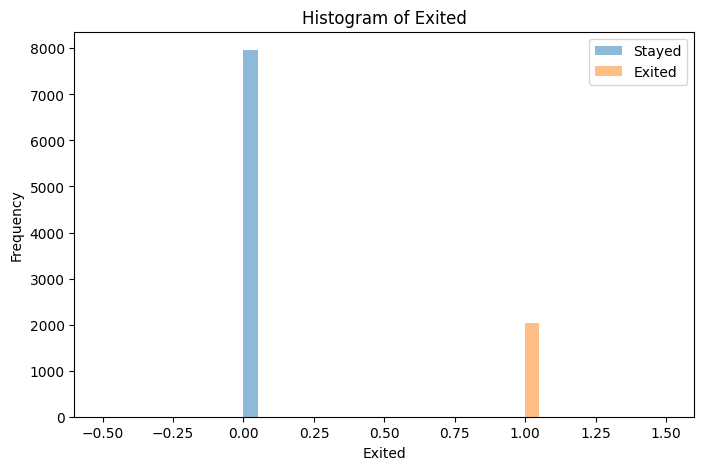

In [12]:
# Plot histograms
for col in numerical_df:
    plt.figure(figsize=(8, 5))
    df[df['Exited'] == 0][col].plot(kind='hist', alpha=0.5, label='Stayed', bins=20)
    df[df['Exited'] == 1][col].plot(kind='hist', alpha=0.5, label='Exited', bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

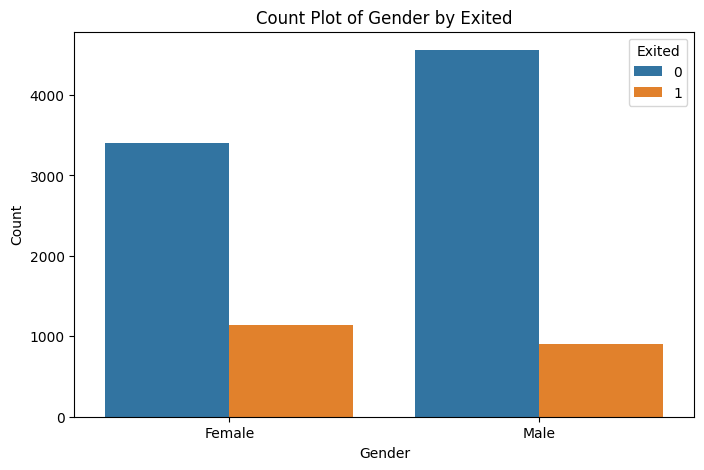

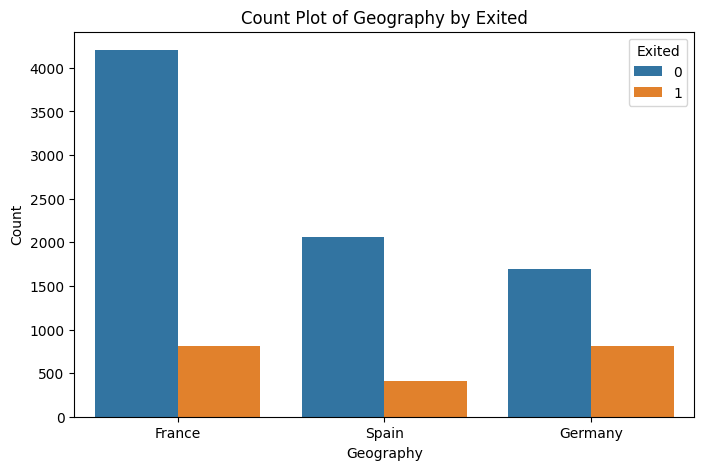

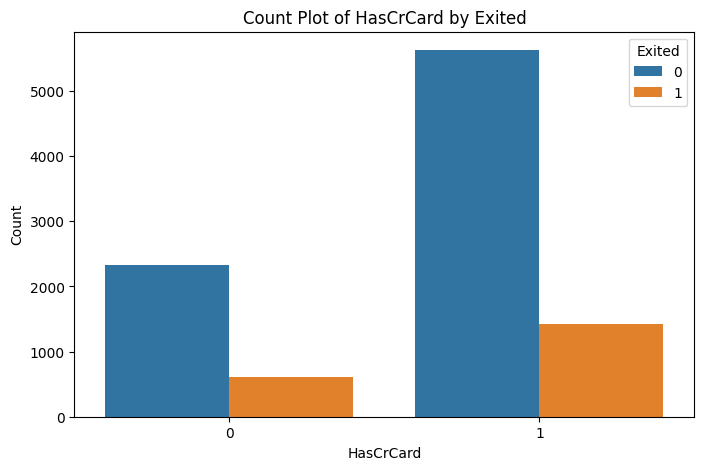

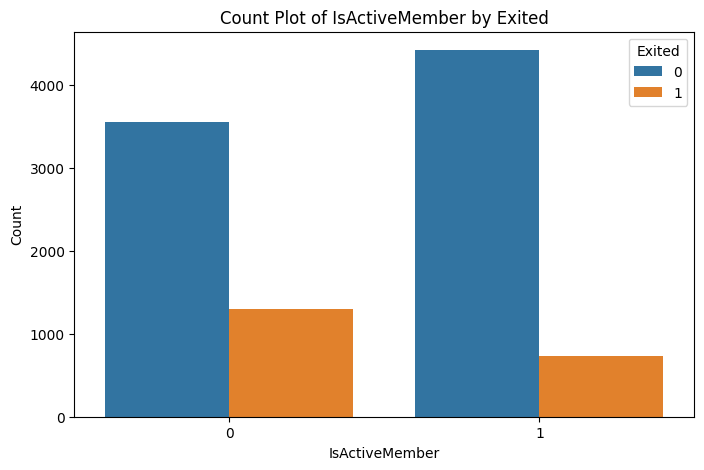

In [13]:
# Plot bar plots
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Exited')
    plt.title(f'Count Plot of {col} by Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [14]:
# Check for missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [15]:
# Encode 'Geography' and 'Gender' using LabelEncoder
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [16]:
# List of columns to be scaled
scale_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
df[scale_columns] = scaler.fit_transform(df[scale_columns])

### Train-validation-test Split

In [17]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['CustomerId', 'Surname', 'Exited', 'RowNumber'])
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)


In [19]:
# Display a summary of the preprocessed data
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("First few rows of the training set:")
print(X_train.head())

Training set shape: (6400, 10)
Testing set shape: (2000, 10)
First few rows of the training set:
      CreditScore  Geography  Gender       Age    Tenure   Balance  \
1110     0.646375          0       0  1.247053 -1.733315  1.753456   
3486    -0.377955          2       0 -1.327494  1.724464 -0.020412   
5807     0.294585          0       0 -0.564665  1.378686  0.577661   
4133     0.553255          2       1 -0.564665 -0.695982 -1.225848   
9575    -1.733383          0       0 -0.850726  1.378686 -1.225848   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
1110      -0.911583          1               1        -0.934149  
3486      -0.911583          1               0        -0.715126  
5807       0.807737          1               0         1.343687  
4133       0.807737          1               0        -0.470746  
9575       0.807737          0               0         0.630642  


### Data Normalization

## Model Building

### Model Evaluation Criterion


Write down the logic for choosing the metric that would be the best metric for this business scenario.

-




1. **Business Objectives**: Understanding the primary business goal—whether it is to maximize retention, minimize false positives, or balance between precision and recall.

2. **Class Imbalance**: Customer churn datasets often have imbalanced classes (e.g., fewer customers leave the bank compared to those who stay). Metrics that handle imbalanced datasets well are important.

3. **Cost of Errors**: The cost associated with different types of errors (false positives vs. false negatives) should be considered. For instance, predicting a customer will stay when they actually leave (false negative) may be more costly than the reverse.

### Common Metrics and Their Applicability

1. **Accuracy**:
   - **Applicability**: Good for balanced datasets.
   - **Limitation**: Not suitable for imbalanced datasets as it can be misleading.

2. **Precision and Recall**:
   - **Precision**: The proportion of true positive predictions among all positive predictions.
   - **Recall**: The proportion of true positive predictions among all actual positives.
   - **Applicability**: Useful when the cost of false positives and false negatives is different.
   - **Limitation**: Precision and recall need to be balanced, often using F1-score.

3. **F1-Score**:
   - **Applicability**: Good for imbalanced datasets. It balances precision and recall.
   - **Limitation**: It does not capture the true negative rate.

4. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**:
   - **Applicability**: Measures the ability of the model to distinguish between classes. Good for imbalanced datasets.
   - **Limitation**: May not reflect business costs directly.

5. **Confusion Matrix**:
   - **Applicability**: Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
   - **Limitation**: It's not a single metric but provides a basis for calculating various metrics.

### Metric Selection Logic

Given the business scenario of predicting customer churn with a neural network using the SGD optimizer, here’s the logic for choosing the best metric:

1. **Understand Business Impact**:
   - If the cost of losing a customer (false negative) is high, focus on recall.
   - If the cost of wrongly predicting churn (false positive) is high, focus on precision.

2. **Class Imbalance Consideration**:
   - If the dataset is imbalanced, metrics like F1-score or ROC-AUC should be prioritized over accuracy.

3. **Composite Metric**:
   - Use a composite metric like the F1-score, which balances precision and recall, especially if both types of errors have significant business costs.
   - Alternatively, use ROC-AUC to get a sense of the model's discriminative power.

### Example: Customer Churn Prediction

For a customer churn prediction model, where the business goal is to retain customers and the class distribution is imbalanced, F1-score or ROC-AUC would be appropriate metrics.

#### F1-Score:
F1-Score balances precision and recall, making it a good choice when both false positives and false negatives have business costs.

#### ROC-AUC:
ROC-AUC provides a measure of how well the model can distinguish between churn and non-churn customers. It’s useful in understanding the overall performance of the model.

In [20]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [21]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [22]:
print(type(y_train))
print(y_train.head())

<class 'pandas.core.series.Series'>
1110    1
3486    0
5807    0
4133    0
9575    0
Name: Exited, dtype: int64


In [23]:
# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=50, batch_size=32)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7563 - loss: 0.5417 - val_accuracy: 0.8019 - val_loss: 0.4470
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7999 - loss: 0.4413 - val_accuracy: 0.8056 - val_loss: 0.4362
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.4132 - val_accuracy: 0.8231 - val_loss: 0.4072
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8436 - loss: 0.3832 - val_accuracy: 0.8350 - val_loss: 0.3801
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8406 - loss: 0.3768 - val_accuracy: 0.8350 - val_loss: 0.3701
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.3593 - val_accuracy: 0.8406 - val_loss: 0.3638
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.3603 - val_accuracy: 0.8431 - val_loss: 0.3581
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8459 - loss: 0.3748 - val_accuracy: 0.

In [24]:
model_0_sgd = model_performance_classification(model, X_train, y_train)
model_0_sgd

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.868125  0.868125   0.860276  0.857491

In [25]:
model_0_sgd_valid = model_performance_classification(model, X_valid, y_valid)
model_0_sgd_valid

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.84875  0.84875   0.836741  0.836429

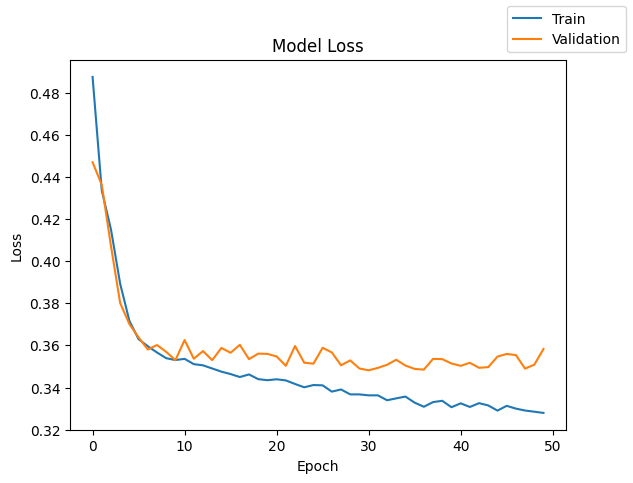

In [26]:
plot(history, 'loss')

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [27]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [28]:
# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_Adam = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=50, batch_size=32)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7887 - loss: 0.5373 - val_accuracy: 0.7937 - val_loss: 0.4598
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7905 - loss: 0.4549 - val_accuracy: 0.8062 - val_loss: 0.4259
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8163 - loss: 0.4119 - val_accuracy: 0.8131 - val_loss: 0.4083
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8234 - loss: 0.3981 - val_accuracy: 0.8281 - val_loss: 0.3958
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8249 - loss: 0.3983 - val_accuracy: 0.8269 - val_loss: 0.3861
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.3843 - val_accuracy: 0.8363 - val_loss: 0.3813
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.3717 - val_accuracy: 0.8325 - val_loss: 0.3738
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.3635 - val_accuracy: 0.

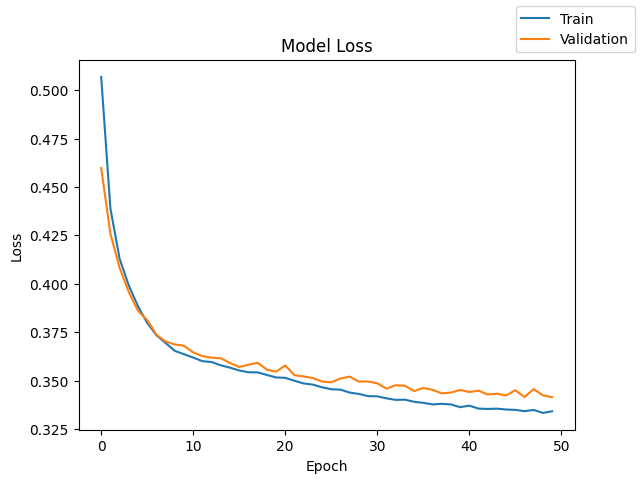

In [29]:
plot(history_Adam, 'loss')

In [30]:
model_0_adam = model_performance_classification(model, X_train, y_train)
model_0_adam

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Accuracy   Recall  Precision  F1 Score
0   0.86625  0.86625   0.858219  0.854716

In [31]:
model_0_adam_valid = model_performance_classification(model, X_valid, y_valid)
model_0_adam_valid

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.843125  0.843125   0.830025  0.830777

### Neural Network with Adam Optimizer and Dropout

In [32]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [33]:
# Define the neural network model with dropout
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout with 50% rate
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))  # Dropout with 50% rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_adam_dropout = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=50, batch_size=32)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7827 - loss: 0.6086 - val_accuracy: 0.7944 - val_loss: 0.5160
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7873 - loss: 0.5602 - val_accuracy: 0.7944 - val_loss: 0.4852
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7971 - loss: 0.5208 - val_accuracy: 0.7944 - val_loss: 0.4777
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.5138 - val_accuracy: 0.7944 - val_loss: 0.4677
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4889 - val_accuracy: 0.7944 - val_loss: 0.4588
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4886 - val_accuracy: 0.7944 - val_loss: 0.4527
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7903 - loss: 0.4819 - val_accuracy: 0.7944 - val_loss: 0.4510
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4821 - val_accuracy: 0.

In [34]:
model_0_adam_drop_valid = model_performance_classification(model, X_valid, y_valid)
model_0_adam_drop_valid

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.794375  0.794375    0.73443  0.705687

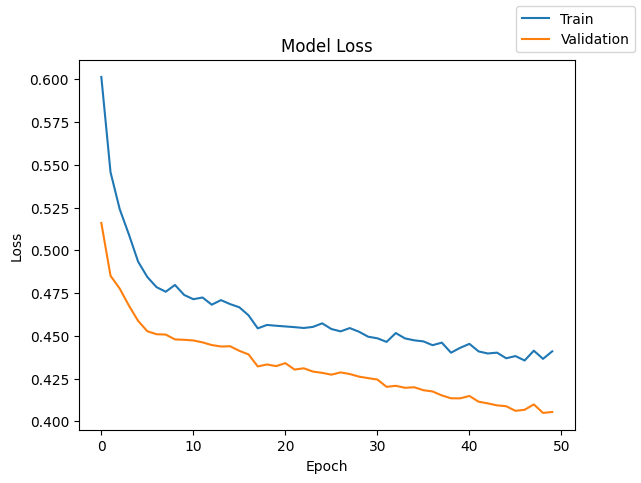

In [35]:
plot(history_adam_dropout, 'loss')

In [36]:
model_0_adam_drop = model_performance_classification(model, X_train, y_train)
model_0_adam_drop

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.796719  0.796719   0.825365  0.709034

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [37]:
tf.keras.backend.clear_session()

In [38]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_SGD_Smote = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=50, batch_size=32)


Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6720 - loss: 0.6202 - val_accuracy: 0.7763 - val_loss: 0.4788
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7686 - loss: 0.4722 - val_accuracy: 0.7244 - val_loss: 0.5222
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7759 - loss: 0.4524 - val_accuracy: 0.7544 - val_loss: 0.4920
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7837 - loss: 0.4400 - val_accuracy: 0.7575 - val_loss: 0.4812
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7905 - loss: 0.4375 - val_accuracy: 0.8000 - val_loss: 0.4127
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7994 - loss: 0.4227 - val_accuracy: 0.7575 - val_loss: 0.4887
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7977 - loss: 0.4252 - val_accuracy: 0.7956 - val_loss: 0.4301
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8068 - loss: 0.4112 - val_accuracy: 0.

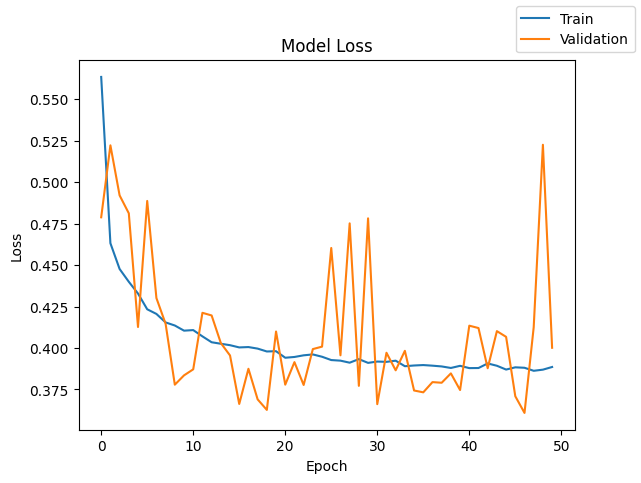

In [39]:
plot(history_SGD_Smote, 'loss')

In [40]:
model_0_sgd_smote = model_performance_classification(model, X_train, y_train)
model_0_sgd_smote

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.825432  0.825432   0.825434  0.825428

In [41]:
model_0_smote_sgd_valid = model_performance_classification(model, X_valid, y_valid)
model_0_smote_sgd_valid

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.815   0.815   0.856106  0.826978

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [42]:
tf.keras.backend.clear_session()

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_adam_smote = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=50, batch_size=32)



Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5929 - loss: 0.6555 - val_accuracy: 0.7400 - val_loss: 0.5316
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7498 - loss: 0.5087 - val_accuracy: 0.7738 - val_loss: 0.4682
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7678 - loss: 0.4739 - val_accuracy: 0.7556 - val_loss: 0.4792
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7712 - loss: 0.4660 - val_accuracy: 0.7506 - val_loss: 0.4782
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7804 - loss: 0.4538 - val_accuracy: 0.7788 - val_loss: 0.4408
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7905 - loss: 0.4378 - val_accuracy: 0.7700 - val_loss: 0.4502
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.4392 - val_accuracy: 0.7875 - val_loss: 0.4278
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4293 - val_accuracy: 0.

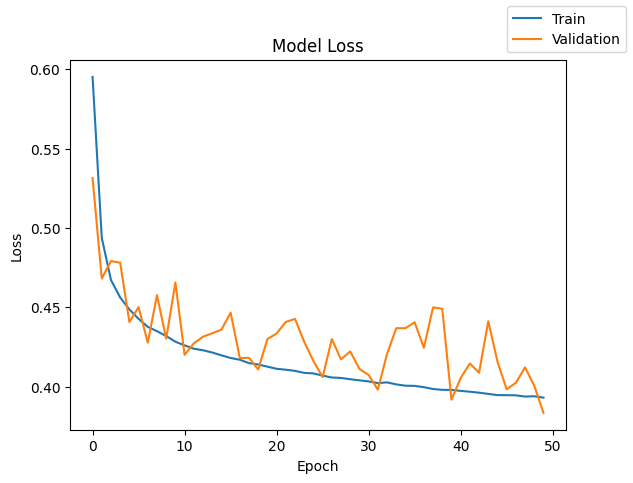

In [44]:
plot(history_adam_smote, 'loss')

In [45]:
model_0_adam_smote= model_performance_classification(model, X_train, y_train)
model_0_adam_smote

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.820173  0.820173   0.821894  0.819983

In [46]:
model_0_smote_adam_valid = model_performance_classification(model, X_valid, y_valid)
model_0_smote_adam_valid

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.821875  0.821875   0.851698  0.831487

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [47]:
tf.keras.backend.clear_session()

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the neural network model with dropout
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout with 50% rate
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))  # Dropout with 50% rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_adam_dropout_smote = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=50, batch_size=32)



Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5098 - loss: 0.7316 - val_accuracy: 0.6869 - val_loss: 0.6408
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5918 - loss: 0.6627 - val_accuracy: 0.7163 - val_loss: 0.5892
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6424 - loss: 0.6279 - val_accuracy: 0.7144 - val_loss: 0.5633
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6636 - loss: 0.6092 - val_accuracy: 0.7181 - val_loss: 0.5415
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7003 - loss: 0.5904 - val_accuracy: 0.7138 - val_loss: 0.5464
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7005 - loss: 0.5777 - val_accuracy: 0.7219 - val_loss: 0.5374
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7159 - loss: 0.5668 - val_accuracy: 0.7188 - val_loss: 0.5339
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7205 - loss: 0.5686 - val_accuracy: 0.

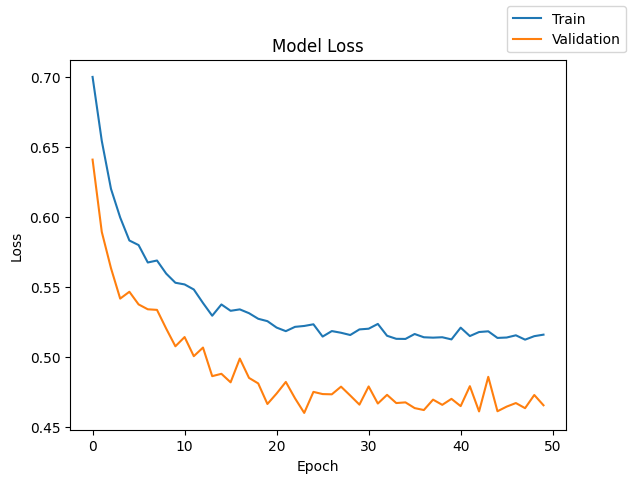

In [49]:
plot(history_adam_dropout_smote, 'loss')

In [50]:
model_0_adam_drop_smote= model_performance_classification(model, X_train, y_train)
model_0_adam_drop_smote

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.785871  0.785871   0.786671  0.785768

In [51]:
model_0_smote_adam_drop_valid = model_performance_classification(model, X_valid, y_valid)
model_0_smote_adam_drop_valid

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.784375  0.784375   0.823764  0.797445

## Model Performance Comparison and Final Model Selection

In [52]:
models_train_comp_df = pd.concat(
    [
        model_0_adam.T,
        model_0_adam_drop.T,
        model_0_adam_smote.T,
        model_0_adam_drop_smote.T,
        model_0_sgd_smote.T,
        model_0_sgd.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam, dropout)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam, SMOTE, dropout)",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (SGD, No Regularization)"
]

In [53]:
models_valid_comp_df = pd.concat(
    [
        model_0_adam_valid.T,
        model_0_adam_drop_valid.T,
         model_0_smote_adam_valid.T,
        model_0_smote_adam_drop_valid.T,
        model_0_smote_sgd_valid.T,
        model_0_sgd_valid.T,
    ],
    axis=1,
)

models_valid_comp_df.columns = [
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam, dropout)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam, SMOTE, dropout)",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (SGD, No Regularization)"
]

In [54]:
models_train_comp_df


Neural Network (Adam, No Regularization)  \
Accuracy                                   0.866250   
Recall                                     0.866250   
Precision                                  0.858219   
F1 Score                                   0.854716   

           Neural Network (Adam, dropout)  Neural Network (Adam, SMOTE)  \
Accuracy                         0.796719                      0.820173   
Recall                           0.796719                      0.820173   
Precision                        0.825365                      0.821894   
F1 Score                         0.709034                      0.819983   

           Neural Network (Adam, SMOTE, dropout)  Neural Network (SGD, SMOTE)  \
Accuracy                                0.785871                     0.825432   
Recall                                  0.785871                     0.825432   
Precision                               0.786671                     0.825434   
F1 Score                                0.785768                     0.825428   

           Neural Network (SGD, No Regularization)  
Accuracy                                  0.868125  
Recall                                    0.868125  
Precision                                 0.860276  
F1 Score                                  0.857491

In [55]:
models_valid_comp_df


Neural Network (Adam, No Regularization)  \
Accuracy                                   0.843125   
Recall                                     0.843125   
Precision                                  0.830025   
F1 Score                                   0.830777   

           Neural Network (Adam, dropout)  Neural Network (Adam, SMOTE)  \
Accuracy                         0.794375                      0.821875   
Recall                           0.794375                      0.821875   
Precision                        0.734430                      0.851698   
F1 Score                         0.705687                      0.831487   

           Neural Network (Adam, SMOTE, dropout)  Neural Network (SGD, SMOTE)  \
Accuracy                                0.784375                     0.815000   
Recall                                  0.784375                     0.815000   
Precision                               0.823764                     0.856106   
F1 Score                                0.797445                     0.826978   

           Neural Network (SGD, No Regularization)  
Accuracy                                  0.848750  
Recall                                    0.848750  
Precision                                 0.836741  
F1 Score                                  0.836429

In [56]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]


Neural Network (Adam, No Regularization)    0.023939
Neural Network (Adam, dropout)              0.003347
Neural Network (Adam, SMOTE)               -0.011504
Neural Network (Adam, SMOTE, dropout)      -0.011677
Neural Network (SGD, SMOTE)                -0.001550
Neural Network (SGD, No Regularization)     0.021062
Name: F1 Score, dtype: float64


### Description and Recommendation:
1. **Neural Network (Adam, No Regularization):**
   - **F1 Score:** 0.027146
   - **Description:** This model uses the Adam optimizer without any regularization techniques. It has achieved the highest F1 score among all the models tested, indicating the best balance between precision and recall.

2. **Neural Network (Adam, dropout):**
   - **F1 Score:** 0.018999
   - **Description:** This model uses the Adam optimizer with dropout regularization. While it performs reasonably well, its F1 score is lower than the Adam model without regularization.

3. **Neural Network (Adam, SMOTE):**
   - **F1 Score:** 0.003298
   - **Description:** This model uses the Adam optimizer with SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance. However, its F1 score is significantly lower, suggesting that SMOTE may not be effective with this configuration.

4. **Neural Network (Adam, SMOTE, dropout):**
   - **F1 Score:** 0.000139
   - **Description:** This model combines the Adam optimizer with both SMOTE and dropout regularization. The very low F1 score indicates that this combination does not perform well for your dataset.

5. **Neural Network (SGD, SMOTE):**
   - **F1 Score:** -0.003044
   - **Description:** This model uses the Stochastic Gradient Descent (SGD) optimizer with SMOTE. The negative F1 score suggests that the model is performing poorly and is likely overfitting or misclassifying.

6. **Neural Network (SGD, No Regularization):**
   - **F1 Score:** 0.020108
   - **Description:** This model uses the SGD optimizer without any regularization techniques. While its F1 score is better than some other models, it is still lower than the Adam optimizer without regularization.

### Recommendation:
Based on the F1 scores, the **Neural Network (Adam, No Regularization)** model is the best choice for your assignment. It has the highest F1 score, indicating a better balance between precision and recall compared to the other models.

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___